In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install lux-api

# Import des librairies

In [3]:
import pandas as pd
import ast
#import lux
import seaborn as sns
import plotly.express as px

#populating the interactive namespace from numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import du dataset energy_2015

In [14]:
energy_2015 = pd.read_csv('/content/drive/My Drive/openclassroom/Pélec_sooprayen_oorvasi/Dataset/2015-building-energy-benchmarking.csv')

# Description des données energy_2015

In [15]:
print("Le jeu de données energy_2015 contient %d lignes et %d colonnes." % (energy_2015.shape[0], energy_2015.shape[1]))

Le jeu de données energy_2015 contient 3340 lignes et 47 colonnes.


In [16]:
energy_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [17]:
energy_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

# Import du dataset energy_2016

In [18]:
energy_2016 = pd.read_csv('/content/drive/My Drive/openclassroom/Pélec_sooprayen_oorvasi/Dataset/2016-building-energy-benchmarking.csv')

# Description des données energy_2016

In [19]:
print("Le jeu de données energy_2015 contient %d lignes et %d colonnes." % (energy_2016.shape[0], energy_2016.shape[1]))

Le jeu de données energy_2015 contient 3376 lignes et 46 colonnes.


In [20]:
energy_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Comparaison 2015 et 2016

## Vérifications des colonnes qui sont *différentes*

In [21]:
def comp_col(energy_2015, energy_2016):
  not_in_2015 = list(set(energy_2015) - set(energy_2016))
  not_in_2016 = list(set(energy_2016) - set(energy_2015))
  return not_in_2015 , not_in_2016

comp_col(energy_2015, energy_2016)

(['Zip Codes',
  'City Council Districts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'Comment',
  'OtherFuelUse(kBtu)',
  'SPD Beats',
  'GHGEmissions(MetricTonsCO2e)',
  'Location',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  '2010 Census Tracts'],
 ['Address',
  'Comments',
  'City',
  'ZipCode',
  'Latitude',
  'GHGEmissionsIntensity',
  'State',
  'Longitude',
  'TotalGHGEmissions'])

In [22]:
energy_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [23]:
energy_2016['City'][0]

'Seattle'

In [24]:
energy_2016['Address'][0]

'405 Olive way'

In [25]:
energy_2016['ZipCode'][0]

98101.0

In [26]:
energy_2015['Zip Codes'][0]

18081

La variable location de 2015 est actuellement un format json des variables city, latitude, longitude, address, state et zip code 

In [27]:
energy_2015['Location'] = [ast.literal_eval(str(item)) for index, item in energy_2015.Location.iteritems()]
energy_2015 = pd.concat([energy_2015.drop(['Location'], axis=1), energy_2015['Location'].apply(pd.Series)], axis=1)

In [28]:
energy_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in energy_2015.human_address.iteritems()]
energy_2015 = pd.concat([energy_2015.drop(['human_address'], axis=1), energy_2015['human_address'].apply(pd.Series)], axis=1)

In [29]:
energy_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


## Renommer les champs

In [30]:
energy_2015 = energy_2015.rename(columns={"latitude":"Latitude","longitude":"Longitude","address":"Address","city":"City","state":"State", "zip":"ZipCode"})

In [31]:
comp_col(energy_2015, energy_2016)

(['Zip Codes',
  'City Council Districts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'Comment',
  'OtherFuelUse(kBtu)',
  'SPD Beats',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  '2010 Census Tracts'],
 ['GHGEmissionsIntensity', 'Comments', 'TotalGHGEmissions'])

In [32]:
energy_2015["Comment"].unique()

array([nan,
       'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
       "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.",
       "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re",
       'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu',
       'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 

In [33]:
energy_2016["Comments"].unique()

array([nan])

Suppression de la colonne Comments de 2016 car il ne contient aucune information.

In [34]:
energy_2016 = energy_2016.drop(columns=['Comments'],axis=1)

## Vérifications des variables qui peuvent avoir la même définition

In [35]:
energy_2015["GHGEmissions(MetricTonsCO2e)"].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

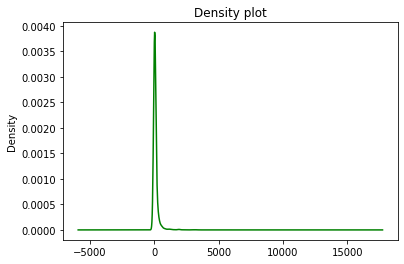

In [36]:
energy_2015["GHGEmissions(MetricTonsCO2e)"].plot.density(color='green')
plt.title('Density plot')
plt.show()

In [37]:
energy_2016["TotalGHGEmissions"].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

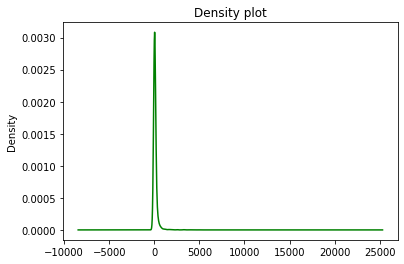

In [38]:
energy_2016["TotalGHGEmissions"].plot.density(color='green')
plt.title('Density plot')
plt.show()

In [39]:
energy_2015["GHGEmissionsIntensity(kgCO2e/ft2)"].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

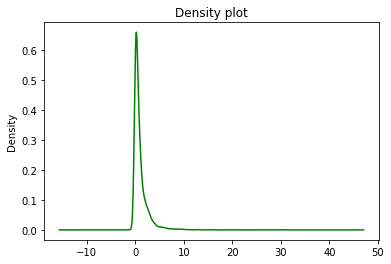

In [40]:
energy_2015["GHGEmissionsIntensity(kgCO2e/ft2)"].plot.density(color='green')
plt.title('Density plot')
plt.show()

In [41]:
energy_2016["GHGEmissionsIntensity"].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

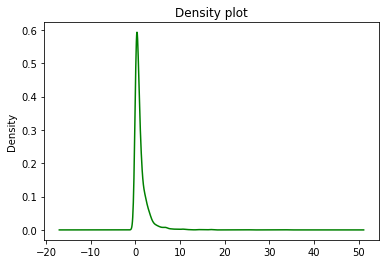

In [42]:
energy_2016["GHGEmissionsIntensity"].plot.density(color='green')
plt.title('Density plot')
plt.show()

    Les ordres de grandeur des 2 variables sont les meme entre 2015 et 2016. On va donc renommer les variables pour celui de 2015.

In [43]:
energy_2015 = energy_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

## Vérifications des variables ne se trouvant pas en 2016

In [44]:
a = comp_col(energy_2015, energy_2016)

In [45]:
a[0]

['Zip Codes',
 'City Council Districts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Comment',
 '2010 Census Tracts']

In [46]:
energy_2015[a[0]]

,Zip Codes,City Council Districts,Seattle Police Department Micro Community Policing Plan Areas,OtherFuelUse(kBtu),SPD Beats,Comment,2010 Census Tracts
0,18081,NaN,14.0,0.0,31.0,NaN,NaN
1,18081,NaN,14.0,0.0,31.0,NaN,NaN
2,18081,NaN,56.0,0.0,31.0,NaN,NaN
3,18081,NaN,56.0,0.0,31.0,NaN,NaN
4,19576,NaN,56.0,0.0,31.0,NaN,NaN
...,...,...,...,...,...,...,...
3335,18379,NaN,26.0,0.0,16.0,NaN,NaN
3336,18383,NaN,60.0,0.0,38.0,NaN,NaN
3337,19576,NaN,56.0,0.0,7.0,NaN,NaN
3338,18792,NaN,55.0,0.0,48.0,NaN,NaN


In [47]:
energy_2015[a[0]]

,Zip Codes,City Council Districts,Seattle Police Department Micro Community Policing Plan Areas,OtherFuelUse(kBtu),SPD Beats,Comment,2010 Census Tracts
0,18081,NaN,14.0,0.0,31.0,NaN,NaN
1,18081,NaN,14.0,0.0,31.0,NaN,NaN
2,18081,NaN,56.0,0.0,31.0,NaN,NaN
3,18081,NaN,56.0,0.0,31.0,NaN,NaN
4,19576,NaN,56.0,0.0,31.0,NaN,NaN
...,...,...,...,...,...,...,...
3335,18379,NaN,26.0,0.0,16.0,NaN,NaN
3336,18383,NaN,60.0,0.0,38.0,NaN,NaN
3337,19576,NaN,56.0,0.0,7.0,NaN,NaN
3338,18792,NaN,55.0,0.0,48.0,NaN,NaN


### Visualisation des valeurs manquantes

Text(0.5, 1.0, 'Visualisation des valeurs manquantes')

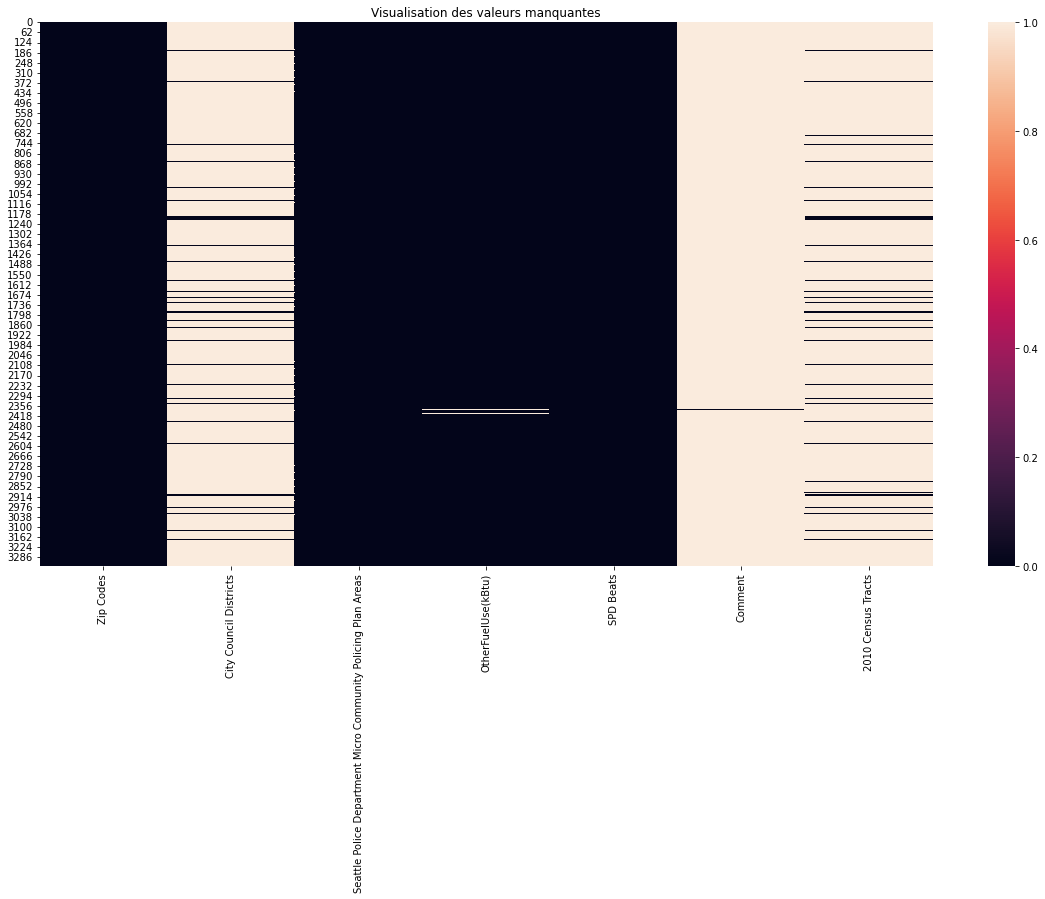

In [48]:
# Heatmap, visualisation des valeurs manquantes dans le tableau
plt.figure(figsize=(20,10))
sns.heatmap(energy_2015[a[0]].isna())
plt.title('Visualisation des valeurs manquantes')

In [49]:
df = pd.DataFrame()
sum_missing_values = energy_2015[a[0]].isnull().sum()
percentage = 100 * sum_missing_values / len(energy_2015[a[0]])
df['% Missing Values'] = percentage.round(2)
df.style.background_gradient(axis=0)

,% Missing Values
Zip Codes,0.000000
City Council Districts,93.620000
Seattle Police Department Micro Community Policing Plan Areas,0.060000
OtherFuelUse(kBtu),0.300000
SPD Beats,0.060000
Comment,99.610000
2010 Census Tracts,93.290000


**ZipCode**

In [50]:
energy_2015["Zip Codes"].value_counts()

18390    309
18379    259
19578    238
18081    234
18383    189
19584    182
19576    180
19575    164
18376    163
18377    158
19579    155
18388    135
18792    124
19582    124
18386    106
18795     94
17919     93
18800     90
18789     72
18235     70
19581     62
18385     62
18798     31
17916     29
18229      7
17920      4
18230      3
17926      2
17923      1
Name: Zip Codes, dtype: int64

In [51]:
energy_2015["ZipCode"].value_counts()

98109    300
98104    261
98122    237
98101    234
98134    201
98105    188
98121    183
98102    168
98119    163
98103    156
98125    155
98108    128
98133    127
98115    125
98107    103
98144     96
98116     94
98118     88
98199     69
98112     68
98126     64
98106     54
98117     34
98136     29
98146      5
98178      4
98177      3
98155      3
Name: ZipCode, dtype: int64

    Les valeurs présentes pour la variable Zip Codes ne correspondent pas aux codes postaux de Seattle. On va donc la supprimer.



**OtherFuelUse(kBtu)**

In [52]:
energy_2015["OtherFuelUse(kBtu)"].value_counts()

0.0          3313
178094.0        1
337952.0        1
12551.0         1
1943011.0       1
6464408.0       1
8269669.0       1
182715.0        1
145944.0        1
427938.0        1
15527.0         1
2304567.0       1
177849.0        1
2944419.0       1
547.0           1
143134.0        1
5596.0          1
229942.0        1
Name: OtherFuelUse(kBtu), dtype: int64

    Plus de 90% da le variable otherFuelUS contient la valeur 0. On va donc la supprimer

**Seattle Police Department Micro Community Policing Plan Areas et SPD Beats**

In [53]:
energy_2015["Seattle Police Department Micro Community Policing Plan Areas"].value_counts()

50.0    342
8.0     239
56.0    218
14.0    209
46.0    172
       ... 
52.0      5
18.0      4
13.0      4
30.0      3
39.0      1
Name: Seattle Police Department Micro Community Policing Plan Areas, Length: 61, dtype: int64

In [54]:
energy_2015["SPD Beats"].value_counts()

40.0    198
5.0     127
10.0    124
9.0     124
12.0    117
36.0    115
39.0    114
7.0     113
38.0    102
27.0     84
22.0     84
48.0     82
19.0     81
4.0      79
1.0      78
28.0     77
49.0     75
50.0     74
26.0     73
20.0     73
35.0     73
2.0      71
11.0     71
47.0     68
30.0     64
3.0      64
37.0     58
24.0     57
31.0     51
6.0      51
33.0     50
16.0     50
32.0     50
34.0     46
17.0     40
21.0     39
29.0     38
15.0     36
25.0     36
13.0     35
42.0     35
51.0     35
18.0     32
41.0     29
8.0      29
45.0     27
44.0     26
43.0     24
14.0     24
23.0     20
46.0     15
Name: SPD Beats, dtype: int64

**Seattle Police Department Micro Community Policing Plan Areas**
 : Les Micro Community Policing Plans (MCPP) ont été conçus pour répondre aux besoins particuliers de chaque communauté. Le service de police de Seattle utilise les MCPP pour s'engager avec les communautés.

Il n'y a pas deux quartiers de Seattle identiques. Les plans adoptent une approche à trois volets qui rassemble l'engagement communautaire, les données sur la criminalité et les services de police pour obtenir une rétroaction directe sur les perceptions de la criminalité et de la sécurité publique. 

**SPD Beats**: Seattle est divisé en cinq zones géographiques. A l'intérieur de ces zones se trouvent les 5 circonscriptions ou postes de police : Nord, Est, Sud, Ouest et Sud-Ouest. Les limites de l'enceinte ont été déterminées en tenant compte des limites du quartier, des limites géographiques et d'autres limites naturelles.

Chaque enceinte contient des zones géographiques plus petites appelées secteurs. Il y a 17 secteurs au total dans la ville.

Chacun de ces secteurs est divisé en 3 sections plus petites appelées battements (c'est-à-dire que le secteur océanique a trois battements O1, O2, O3).

### Suppression des colonnes avec plus de 90% de nans

    On supprime comment, City Council Districts et 2010 Census Tracts car plus de 90% de valeurs nans et non pertinent pour la suite de l'analyse.

    On supprime aussi les variables SPD Beats et Seattle Police Department Micro Community Policing Plan Areas car inutile pour la suite de l'analyse.

In [55]:
energy_2015=energy_2015.drop(['Comment','2010 Census Tracts','City Council Districts','Zip Codes','OtherFuelUse(kBtu)','SPD Beats','Seattle Police Department Micro Community Policing Plan Areas'], axis=1)

# Vérifications des types de données de 2015 et 2016.

In [56]:
pd.DataFrame([energy_2015.dtypes, energy_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,int64,int64,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object
1,int64,int64,object,object,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,float64,float64,object,object,object,float64


On remarque qu'il y a certaines variables qui n'ont pas le meme types

- NumberofBuildings(int/float)
- NumberofFloors(float/int)
- DefaultData (objet/bool)
- Latitude (objet/float)
- Longitude (objet/float)
- ZipCode (object/float)

In [57]:
energy_2015[['NumberofBuildings','NumberofFloors','DefaultData','Latitude','Longitude','ZipCode']].head(2)

,NumberofBuildings,NumberofFloors,DefaultData,Latitude,Longitude,ZipCode
0,1,12.0,No,47.61219025,-122.33799744,98101
1,1,11.0,No,47.61310583,-122.33335756,98101


In [58]:
energy_2015['DefaultData'].unique()

array(['No', 'Yes', nan], dtype=object)

In [59]:
energy_2016[['NumberofBuildings','NumberofFloors','DefaultData','Latitude','Longitude','ZipCode']].head(2)

,NumberofBuildings,NumberofFloors,DefaultData,Latitude,Longitude,ZipCode
0,1.0,12,False,47.61220,-122.33799,98101.0
1,1.0,11,False,47.61317,-122.33393,98101.0


## Changement des types

In [60]:
energy_2015[['Latitude','Longitude', 'ZipCode', 'NumberofBuildings']] = energy_2015[['Latitude','Longitude', 'ZipCode', 'NumberofBuildings']].astype('float64')

In [61]:
energy_2015['DefaultData'] = energy_2015['DefaultData'].map({'Yes' : True, 'No' : False})

In [62]:
energy_2016['NumberofFloors'] = energy_2016[['NumberofFloors']].astype('float64')

In [63]:
pd.DataFrame([energy_2015.dtypes, energy_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,int64,int64,object,object,object,object,int64,object,int64,float64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,float64,object,object,object,float64
1,int64,int64,object,object,object,object,int64,object,int64,float64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,float64,float64,object,object,object,float64


# Vérifications Doublons sur la variable OSEBuildingID

In [64]:
duplicates = energy_2015.duplicated(subset = ["OSEBuildingID"])
len(energy_2015[duplicates])

0

In [65]:
duplicates = energy_2016.duplicated(subset = ["OSEBuildingID"])
len(energy_2016[duplicates])

0

# Fusionner les deux jeux de données

On va concatener les 2 datasets

In [66]:
# Jointure entre le dataset de 2015 et de 2016
df = pd.concat([energy_2015,energy_2016]).sort_values('OSEBuildingID')

On sauvegarde le jeu de données

In [67]:
df.to_csv("/content/drive/My Drive/openclassroom/Pélec_sooprayen_oorvasi/Dataset/2015-2016-building-energy-benchmarking.csv")

# Import du jeu de donnée fusionner

In [68]:
energy_2015_2016 = pd.read_csv('/content/drive/My Drive/openclassroom/Pélec_sooprayen_oorvasi/Dataset/2015-2016-building-energy-benchmarking.csv', index_col=0)

In [69]:
energy_2015_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.0,1.080307e+06,3686160.0,12724.00000,1272388.0,249.43,2.64,False,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
0,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,False,Compliant,NaN,47.612200,-122.337990,405 Olive way,Seattle,WA,98101.0
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,False,Compliant,NaN,47.613170,-122.333930,724 Pine street,Seattle,WA,98101.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8354235.0,8765788.0,0.0,1.144563e+06,3905411.0,44490.00000,4448985.0,263.51,2.38,False,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,73130656.0,75506272.0,19660404.0,1.458393e+07,49762435.0,37099.00000,3709900.0,2061.48,1.92,True,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0


In [70]:
print("Le jeu de données contient %d lignes et %d colonnes." % (energy_2015_2016.shape[0], energy_2015_2016.shape[1]))

Le jeu de données contient 6716 lignes et 45 colonnes.


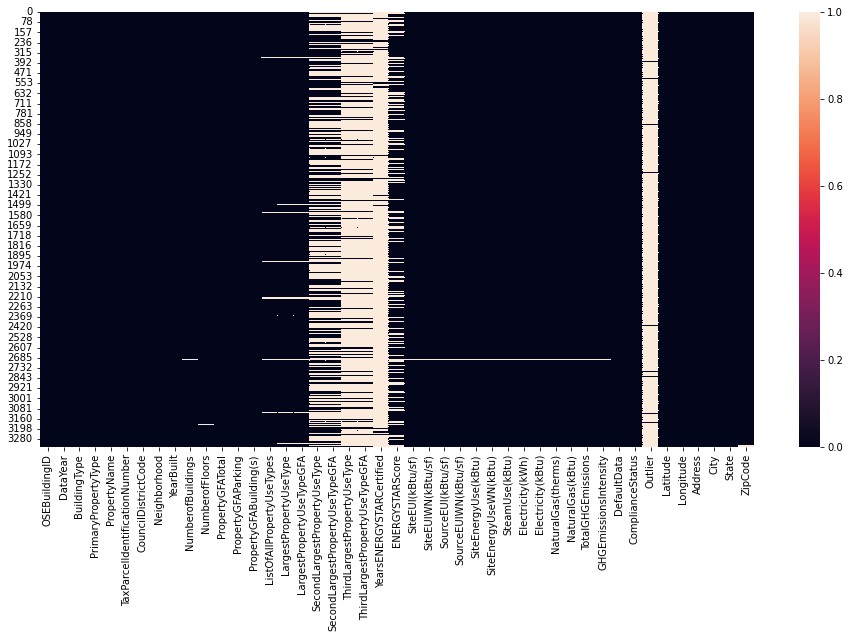

In [71]:
fig, ax = plt.subplots(figsize=(16,8)) 
sns.heatmap(energy_2015_2016.isnull())

# Imputation des valeurs manquantes 

**Zip codes**

    On remplace les zip codes manquantes par rapport à l'addresse.

In [72]:
# Verify where zip code is nan
no_zipcode = energy_2015_2016[energy_2015_2016['ZipCode'].isna()][['Address', 'City', 'State', 'ZipCode']]

In [73]:
no_zipcode.head()

,Address,City,State,ZipCode
3360,10510 5th Ave NE,Seattle,WA,NaN
3361,405 MLK Jr Way S,Seattle,WA,NaN
3362,8729 15th Ave NW,Seattle,WA,NaN
3363,2806 NE 127th St,Seattle,WA,NaN
3364,6020 28th ave NW,Seattle,WA,NaN


In [74]:
#Importing the Nominatim geocoder class 
from geopy.geocoders import Nominatim
from time import sleep
from geopy.exc import GeocoderTimedOut
zipcodes = []

# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

#loop in column Address to get address we need to geocode
for place in no_zipcode['Address']:
  
  #applying geocode method to get the location
  location = geolocator.geocode(place, timeout = 10)
  
  print(location)
  if location != None:
    data = location.raw
    loc_data = data['display_name'].split()
    zipcodes.append(loc_data[-3][:5])
  else:
    zipcodes.append(np.NAN)
  print("Zip code : ",loc_data[-3][:5])
    

Northgate Community Center, 10510, 5th Avenue Northeast, Northgate, Seattle, King County, Washington, 98125, United States
Zip code :  98125
None
Zip code :  98125
Seattle City Fire Station Number 35, 8729, 15th Avenue Northwest, Crown Hill, Seattle, King County, Washington, 98117, United States
Zip code :  98117
2806, Northeast 127th Street, Lake City, Seattle, King County, Washington, 98125, United States
Zip code :  98125
Ballard Community Center, 6020, 28th Avenue Northwest, Sunset Hill, Ballard, Seattle, King County, Washington, 98107, United States
Zip code :  98107
Ballard Pool, 1471, Northwest 67th Street, Whittier Heights, Ballard, Seattle, King County, Washington, 98117, United States
Zip code :  98117
West Howe, Bunnell, Flagler County, Florida, 32110, United States
Zip code :  32110
Volunteer Park Conservatory, 1400, East Galer Street, Capitol Hill, Seattle, King County, Washington, 98112, United States
Zip code :  98112
Garfield Community Center, 2323, East Cherry Street, 

In [75]:
zipcodes

['98125',
 nan,
 '98117',
 '98125',
 '98107',
 '98117',
 '32110',
 '98112',
 '98122',
 '14020',
 '98126',
 '98108',
 '98104',
 '98119',
 '98108',
 '98108']

Vérification de l'addresse dont le zip code n'a pas pu être calculer

In [76]:
# place input by geek
place = "405 Martin Luther King Junior Way South"
location = geolocator.geocode(place)
print(location)

# traverse the data
data = location.raw
loc_data = data['display_name'].split()
print("Full Location")
print("Zip code : ",loc_data[-3][:5])

Seattle Fire Department Station #6, 405, Martin Luther King Junior Way South, Leschi, Seattle, King County, Washington, 98144, United States
Full Location
Zip code :  98144


In [77]:
#List comprehension to replace nan values in zipcodes
zipcodes = [98144 if str(x)=='nan' else x for x in zipcodes]

In [78]:
zipcodes

['98125',
 98144,
 '98117',
 '98125',
 '98107',
 '98117',
 '32110',
 '98112',
 '98122',
 '14020',
 '98126',
 '98108',
 '98104',
 '98119',
 '98108',
 '98108']

In [79]:
#Convert type of zipcodes to float
zipcodes = [float(item) for item in zipcodes]

In [80]:
zipcodes

[98125.0,
 98144.0,
 98117.0,
 98125.0,
 98107.0,
 98117.0,
 32110.0,
 98112.0,
 98122.0,
 14020.0,
 98126.0,
 98108.0,
 98104.0,
 98119.0,
 98108.0,
 98108.0]

In [81]:
#Replace nan values in zipcode column with zipcodes list calculated
for i in zipcodes:
  energy_2015_2016['ZipCode'] = energy_2015_2016['ZipCode'].fillna(i)

**Vérifications des variables catégoriques**

In [82]:
for i in energy_2015_2016.select_dtypes(include=['object']):
  print(energy_2015_2016[i].unique())

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility' 'Self-Storage Facility\n' 'Warehouse'
 'Distribution Center' 'Large Office' 'Retail Store'
 'Low-Rise Multifamily' 'Senior Care Community' 'Medical Office'
 'Hospital' 'Residence Hall/Dormitory' 'Residence Hall'
 'Non-Refrigerated Warehouse' 'Distribution Center\n' 'SPS-District K-12'
 'Worship Facility' 'Supermarket/Grocery Store'
 'Supermarket / Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'High-Rise Multifamily' 'Restaurant\n' 'Restaurant' 'Office']
['MAYFLOWER PARK HOTEL' 'Mayflower park hotel' 'Paramount Hotel' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
['659000030' '0659000030' '0659000220' ... '1624049080' '78

On renomme les valeurs

In [83]:
energy_2015_2016['City'] = energy_2015_2016['City'].replace('SEATTLE', 'Seattle')

In [84]:
energy_2015_2016['City'].unique()

array(['Seattle'], dtype=object)

In [85]:
energy_2015_2016['PrimaryPropertyType'] = energy_2015_2016['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant')
energy_2015_2016['PrimaryPropertyType'] = energy_2015_2016['PrimaryPropertyType'].replace('Self-Storage Facility\n', 'Self-Storage Facility')
energy_2015_2016['PrimaryPropertyType'] = energy_2015_2016['PrimaryPropertyType'].replace('Distribution Center\n', 'Distribution Center')
energy_2015_2016['PrimaryPropertyType'] = energy_2015_2016['PrimaryPropertyType'].replace('Supermarket / Grocery Store', 'Store')

In [86]:
energy_2015_2016['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'College/University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'Distribution Center', 'Large Office', 'Retail Store',
       'Low-Rise Multifamily', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Residence Hall/Dormitory', 'Residence Hall',
       'Non-Refrigerated Warehouse', 'SPS-District K-12',
       'Worship Facility', 'Supermarket/Grocery Store', 'Store',
       'Laboratory', 'Refrigerated Warehouse', 'High-Rise Multifamily',
       'Restaurant', 'Office'], dtype=object)

In [87]:
energy_2015_2016['ComplianceStatus'] = energy_2015_2016['ComplianceStatus'].replace('Not Compliant', 'Non-Compliant')

In [88]:
energy_2015_2016['Neighborhood'] = energy_2015_2016['Neighborhood'].replace('Central', 'CENTRAL')
energy_2015_2016['Neighborhood'] = energy_2015_2016['Neighborhood'].replace('Ballard', 'BALLARD')
energy_2015_2016['Neighborhood'] = energy_2015_2016['Neighborhood'].replace('North', 'NORTH')
energy_2015_2016['Neighborhood'] = energy_2015_2016['Neighborhood'].replace('Northwest', 'NORTHWEST')
energy_2015_2016['Neighborhood'] = energy_2015_2016['Neighborhood'].replace('Delridge', 'DELRIDGE')
energy_2015_2016['Neighborhood'] = energy_2015_2016['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')

In [89]:
energy_2015_2016.duplicated().any()

False

# Vérifications des données inutiles

**Building Type**

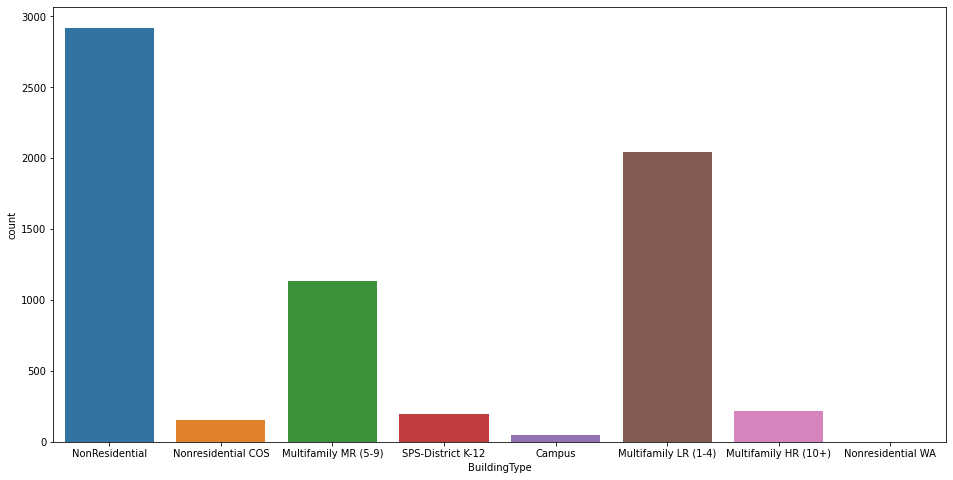

In [90]:
fig, ax = plt.subplots(figsize=(16,8)) 
sns.countplot(x='BuildingType',data=energy_2015_2016)

    Vu que le projet est centrer sur les bâtiments non destinés à l’habitation. On va enlever tout ceux destinés à l'habitation.

In [91]:
energy_2015_2016['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Les HR, LR et MR sont des zones résidentielles, on va donc les supprimer.

In [92]:
energy_2015_2016 = energy_2015_2016[~energy_2015_2016['BuildingType'].str.contains("Multifamily")]
energy_2015_2016['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [93]:
energy_2015_2016.shape

(3318, 45)

In [94]:
df = pd.DataFrame()
sum_missing_values = energy_2015_2016.isnull().sum()
percentage = 100 * sum_missing_values / len(energy_2015_2016)
df['% Missing Values'] = percentage.round(2)
df.style.background_gradient(axis=0, cmap='PuBuGn')

,% Missing Values
OSEBuildingID,0.000000
DataYear,0.000000
BuildingType,0.000000
PrimaryPropertyType,0.000000
PropertyName,0.000000
TaxParcelIdentificationNumber,0.030000
CouncilDistrictCode,0.000000
Neighborhood,0.000000
YearBuilt,0.000000
NumberofBuildings,0.060000


# Vérifications des variables contenant plus de 95% de nans

**Outlier**

In [95]:
energy_2015_2016['Outlier'].value_counts(dropna = False)

NaN             3270
Low Outlier       17
Low outlier       15
High Outlier      14
High outlier       2
Name: Outlier, dtype: int64

**YearsENERGYSTARCertified**

In [96]:
energy_2015_2016['YearsENERGYSTARCertified'].value_counts(dropna = False)

NaN                                                     3130
2016                                                      26
2009                                                       8
2013                                                       7
2016, 2015                                                 6
                                                        ... 
2016, 2015, 2014, 2013, 2011, 2010, 2009, 2007, 2000       1
2017201520142013                                           1
2012, 2010, 2009, 2008                                     1
2017201620152014201320112008                               1
2017201320092008                                           1
Name: YearsENERGYSTARCertified, Length: 114, dtype: int64

In [97]:
energy_2015_2016 = energy_2015_2016.drop(['YearsENERGYSTARCertified','Outlier'], axis=1)

# Vérifications des variables redondantes

## Matrice de corrélations

In [98]:
energy_2015_2016.corr().style.background_gradient(cmap="PuBuGn")

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,ZipCode
OSEBuildingID,1.000000,0.028831,-0.166613,-0.024517,0.036212,-0.256221,-0.208915,-0.221643,-0.182849,-0.172030,-0.240204,-0.158390,-0.052609,-0.007659,0.000936,-0.045884,-0.041672,-0.127034,-0.188555,-0.029276,-0.149568,-0.149570,-0.069702,-0.069702,-0.088832,0.083217,0.029364,0.084867,0.137519
DataYear,0.028831,1.000000,-0.004200,0.011587,0.023251,-0.000888,0.012716,-0.009349,0.015383,0.015181,0.009919,0.027249,0.021975,0.007658,-0.003606,0.002172,-0.003149,0.014728,0.003588,0.003694,0.011978,0.011972,0.012032,0.012032,0.011991,0.058263,0.001011,0.005858,0.016377
CouncilDistrictCode,-0.166613,-0.004200,1.000000,-0.050694,-0.019873,0.274144,0.128627,0.194934,0.101688,0.086737,0.181465,0.047368,0.078616,0.090491,0.081323,0.115526,0.111700,0.068387,0.083068,0.011206,0.095911,0.095912,0.000833,0.000833,0.024774,0.004039,0.526521,-0.333482,-0.208382
YearBuilt,-0.024517,0.011587,-0.050694,1.000000,-0.018763,0.094514,0.142139,0.282255,0.099920,0.108395,0.251135,0.150982,-0.035970,0.129828,0.122090,0.167024,0.163622,0.096377,0.140124,0.009351,0.112922,0.112924,0.063093,0.063093,0.065938,-0.015890,0.064956,0.012286,0.088513
NumberofBuildings,0.036212,0.023251,-0.019873,-0.018763,1.000000,-0.019240,0.631559,0.000911,0.677381,0.698221,0.135835,-0.012099,-0.039657,0.022995,0.003974,0.021110,0.000969,0.603420,0.111928,0.284927,0.632236,0.632230,0.097289,0.097289,0.348855,0.021985,0.008928,0.023899,-0.009195
NumberofFloors,-0.256221,-0.000888,0.274144,0.094514,-0.019240,1.000000,0.485863,0.497440,0.428603,0.416651,0.507224,0.291696,0.112288,0.027963,0.013873,0.065788,0.056535,0.271098,0.330839,0.102077,0.343523,0.343527,0.044709,0.044709,0.152505,-0.045995,-0.010842,-0.009258,-0.179122
PropertyGFATotal,-0.208915,0.012716,0.128627,0.142139,0.631559,0.485863,1.000000,0.464556,0.986305,0.971510,0.811355,0.558577,0.123656,0.044551,0.017357,0.064694,0.041151,0.767440,0.469818,0.392078,0.815383,0.815382,0.211140,0.211140,0.518734,-0.010684,-0.002847,0.014749,-0.091470
PropertyGFAParking,-0.221643,-0.009349,0.194934,0.282255,0.000911,0.497440,0.464556,1.000000,0.312138,0.354166,0.484659,0.273062,0.099103,0.064713,0.054309,0.110044,0.103389,0.205143,0.250381,0.004255,0.266251,0.266254,0.068344,0.068344,0.094081,-0.085937,0.034454,-0.031073,-0.118755
PropertyGFABuilding(s),-0.182849,0.015383,0.101688,0.099920,0.677381,0.428603,0.986305,0.312138,1.000000,0.976072,0.797491,0.574661,0.116839,0.035720,0.008511,0.048909,0.024892,0.785105,0.457414,0.419830,0.825158,0.825156,0.213783,0.213783,0.538977,0.004544,-0.009472,0.021610,-0.076013
LargestPropertyUseTypeGFA,-0.172030,0.015181,0.086737,0.108395,0.698221,0.416651,0.971510,0.354166,0.976072,1.000000,0.766941,0.464071,0.116422,0.032101,0.005578,0.041856,0.017772,0.807286,0.465164,0.453139,0.836142,0.836140,0.233143,0.233143,0.572219,0.025854,-0.001855,0.023975,-0.067640


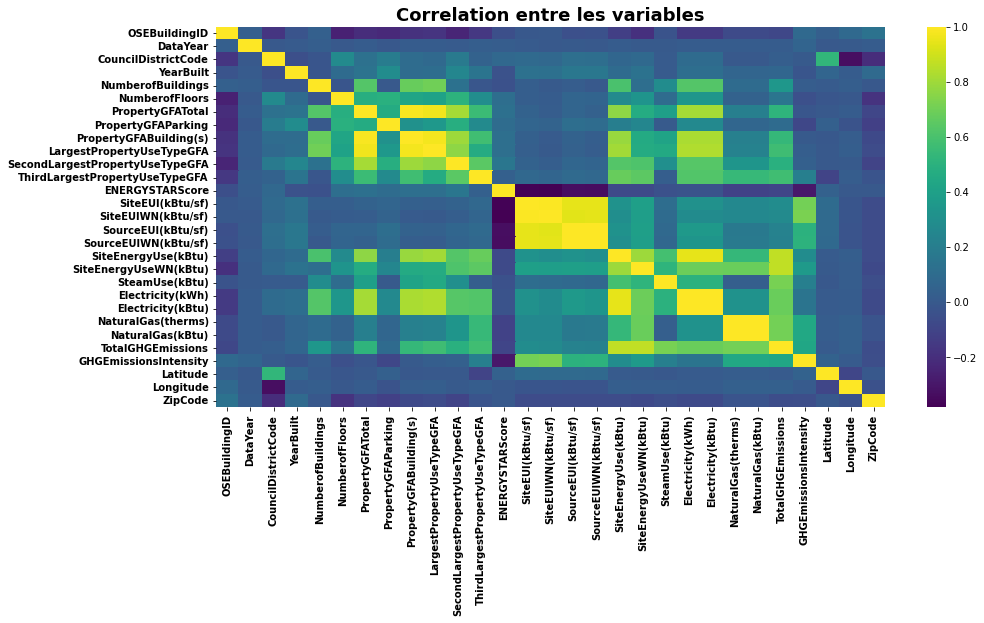

In [99]:
ac_corr=energy_2015_2016.corr()
f,ax=plt.subplots(figsize=(15,7))
sns.heatmap(ac_corr, cmap='viridis')
plt.title("Correlation entre les variables", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

**Electricity(kWh), Electricity(kBtu)**

In [100]:
fig = px.scatter(energy_2015_2016, x="Electricity(kWh)", y="Electricity(kBtu)", title="Electricity")
fig.show()

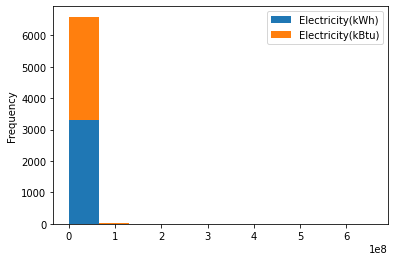

In [101]:
Electricity = energy_2015_2016[['Electricity(kWh)','Electricity(kBtu)']]

Electricity.plot.hist(stacked=True)

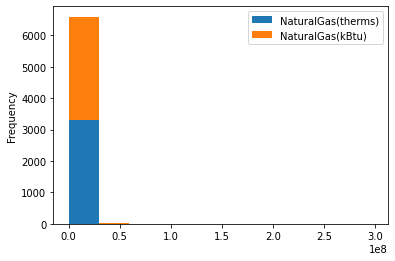

In [102]:
NaturalGas = energy_2015_2016[['NaturalGas(therms)','NaturalGas(kBtu)']]

NaturalGas.plot.hist(stacked=True)

**SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf)**

In [103]:
fig = px.scatter(energy_2015_2016, x="SiteEUI(kBtu/sf)", y="SiteEUIWN(kBtu/sf)", title="")
fig.show()

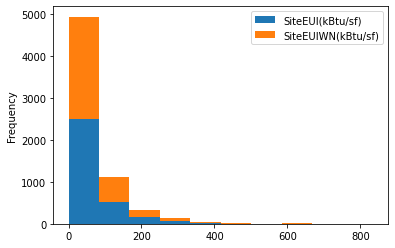

In [104]:
SiteEUI = energy_2015_2016[['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)']]

SiteEUI.plot.hist(stacked=True)

**SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf)**


In [105]:
fig = px.scatter(energy_2015_2016, x="SourceEUI(kBtu/sf)", y="SourceEUIWN(kBtu/sf)", title="")
fig.show()

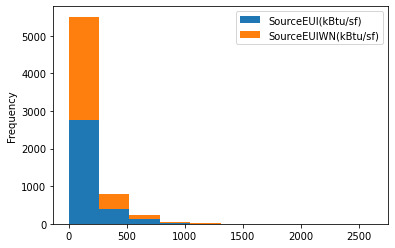

In [106]:
SourceEUI = energy_2015_2016[['SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)']]

SourceEUI.plot.hist(stacked=True)

**SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu)**

In [107]:
fig = px.scatter(energy_2015_2016, x="SiteEnergyUse(kBtu)", y="SiteEnergyUseWN(kBtu)", title="")
fig.show()

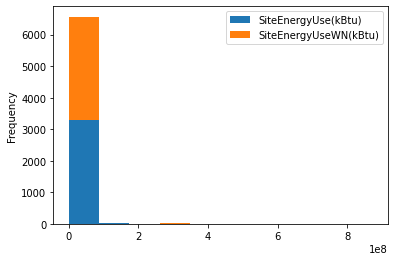

In [108]:
SiteEnergyUse = energy_2015_2016[['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)']]

SiteEnergyUse.plot.hist(stacked=True)

**NaturalGas(therms), NaturalGas(kBtu)**

In [109]:
fig = px.scatter(energy_2015_2016, x="NaturalGas(therms)", y="NaturalGas(kBtu)", title="")
fig.show()

kBTu : le B.T.U. (British Thermal Unit) est une unité de mesure d'énergie thermique. Le BTU, de symbole Btu, est utilisé dans les pays anglo-saxons et asiatiques et équivaut à 1055,06 Joule ou 252 calories.
1 BTU est l’énergie nécessaire pour chauffer ou refroidir une livre d’eau de 1 degré Fahrenheit au niveau de la mer.
Pour convertir une puissance en Btu une puissance en watt il suffit de diviser la puissance en Btu par 3414,5 pour obtenir la puissance en Kw.

therms : le therm est une unité d'énergie thermique anglo-saxone égale à 1 000 000 unités thermiques britanniques (BTU).

1 kWh = 0.034095106405145 thm

1 thm = 29.329722222222 kWh

Les suffixes WN : "Weather Normalized" sont les mesures normalisées avec les conditions climatiques. 

Dans cette analyse, la météo ne rentrera n'est d'aucune utilité.

On supprime les valeurs redondantes

In [110]:
for col in energy_2015_2016.columns:
  if 'WN' in col: 
    energy_2015_2016.drop(col, axis=1, inplace=True)

In [111]:
energy_2015_2016 = energy_2015_2016.drop(columns=["Electricity(kWh)","NaturalGas(therms)"],axis=1)

In [112]:
energy_2015_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'DefaultData', 'ComplianceStatus', 'Latitude',
       'Longitude', 'Address', 'City', 'State', 'ZipCode'],
      dtype='object')

# Vérifications des variables aberrantes

In [113]:
energy_2015_2016.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,ZipCode
count,3318.000000,3318.000000,3318.000000,3318.000000,3316.000000,3310.000000,3.318000e+03,3318.000000,3.318000e+03,3.247000e+03,1667.000000,684.000000,2211.000000,3308.000000,3309.000000,3.309000e+03,3.309000e+03,3.309000e+03,3.309000e+03,3309.000000,3309.000000,3318.000000,3318.000000,3318.000000
mean,15951.816154,2015.502712,4.365883,1961.536769,1.117310,4.126888,1.156672e+05,13303.304702,1.023639e+05,9.539352e+04,36144.703237,14059.484501,64.815920,71.608343,175.440012,8.068625e+06,4.934034e+05,5.636556e+06,1.876485e+06,177.038779,1.479716,47.616006,-122.333051,98116.620555
std,13411.897096,0.500068,2.195304,32.709772,2.219845,6.567333,2.511222e+05,43596.620504,2.340749e+05,2.274274e+05,68243.536838,32754.908986,28.549886,72.372179,180.787065,2.525462e+07,5.226678e+06,1.740900e+07,7.898387e+06,666.442480,2.214812,0.048102,0.024535,17.040565
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-2.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000,-2.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000,47.499170,-122.411820,98006.000000
25%,579.000000,2015.000000,2.000000,1930.000000,1.000000,1.000000,2.951225e+04,0.000000,2.850775e+04,2.550000e+04,5400.000000,2626.250000,47.000000,33.200001,76.200000,1.223425e+06,0.000000e+00,7.236670e+05,0.000000e+00,19.720000,0.270000,47.585595,-122.343357,98105.000000
50%,21122.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.924600e+04,0.000000,4.736800e+04,4.320000e+04,12102.000000,6000.000000,72.000000,51.700000,131.300003,2.505271e+06,0.000000e+00,1.623657e+06,4.797690e+05,49.160000,0.780000,47.612313,-122.333019,98109.000000
75%,24556.750000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.047860e+05,0.000000,9.447150e+04,9.000000e+04,31190.500000,12400.000000,89.000000,81.699997,204.899994,6.917280e+06,0.000000e+00,4.878886e+06,1.471375e+06,138.870000,1.760000,47.649156,-122.321825,98125.000000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000,47.733870,-122.258640,98199.000000


In [114]:
cols = energy_2015_2016.select_dtypes('float','integer').columns

In [115]:
cols

Index(['NumberofBuildings', 'NumberofFloors', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'ZipCode'],
      dtype='object')

In [116]:
energy_2015_2016[cols[:14]]

,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1.0,12.0,88434.0,NaN,NaN,65.0,78.900000,173.500000,6.981428e+06,2023032.0,3.686160e+06,1.272388e+06,249.43,2.64
0,1.0,12.0,88434.0,NaN,NaN,60.0,81.699997,182.500000,7.226362e+06,2003882.0,3.946027e+06,1.276453e+06,249.98,2.83
1,1.0,11.0,83880.0,15064.0,4622.0,61.0,94.800003,176.100006,8.387933e+06,0.0,3.242851e+06,5.145082e+06,295.86,2.86
1,1.0,11.0,83880.0,15064.0,4622.0,51.0,94.400000,191.300000,8.354235e+06,0.0,3.905411e+06,4.448985e+06,263.51,2.38
2,1.0,41.0,757243.0,100000.0,0.0,18.0,96.600000,242.700000,7.313066e+07,19660404.0,4.976244e+07,3.709900e+06,2061.48,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,1.0,1.0,12294.0,NaN,NaN,46.0,69.099998,161.699997,8.497457e+05,0.0,5.242709e+05,3.254750e+05,20.94,1.70
3372,1.0,1.0,16000.0,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,0.0,3.965461e+05,5.537300e+05,32.17,2.01
3373,1.0,1.0,7583.0,5574.0,0.0,NaN,438.200012,744.799988,5.765898e+06,0.0,1.792159e+06,3.973739e+06,223.54,16.99
3374,1.0,1.0,6601.0,6501.0,484.0,NaN,51.000000,105.300003,7.194712e+05,0.0,3.488702e+05,3.706010e+05,22.11,1.57


## Boxplots

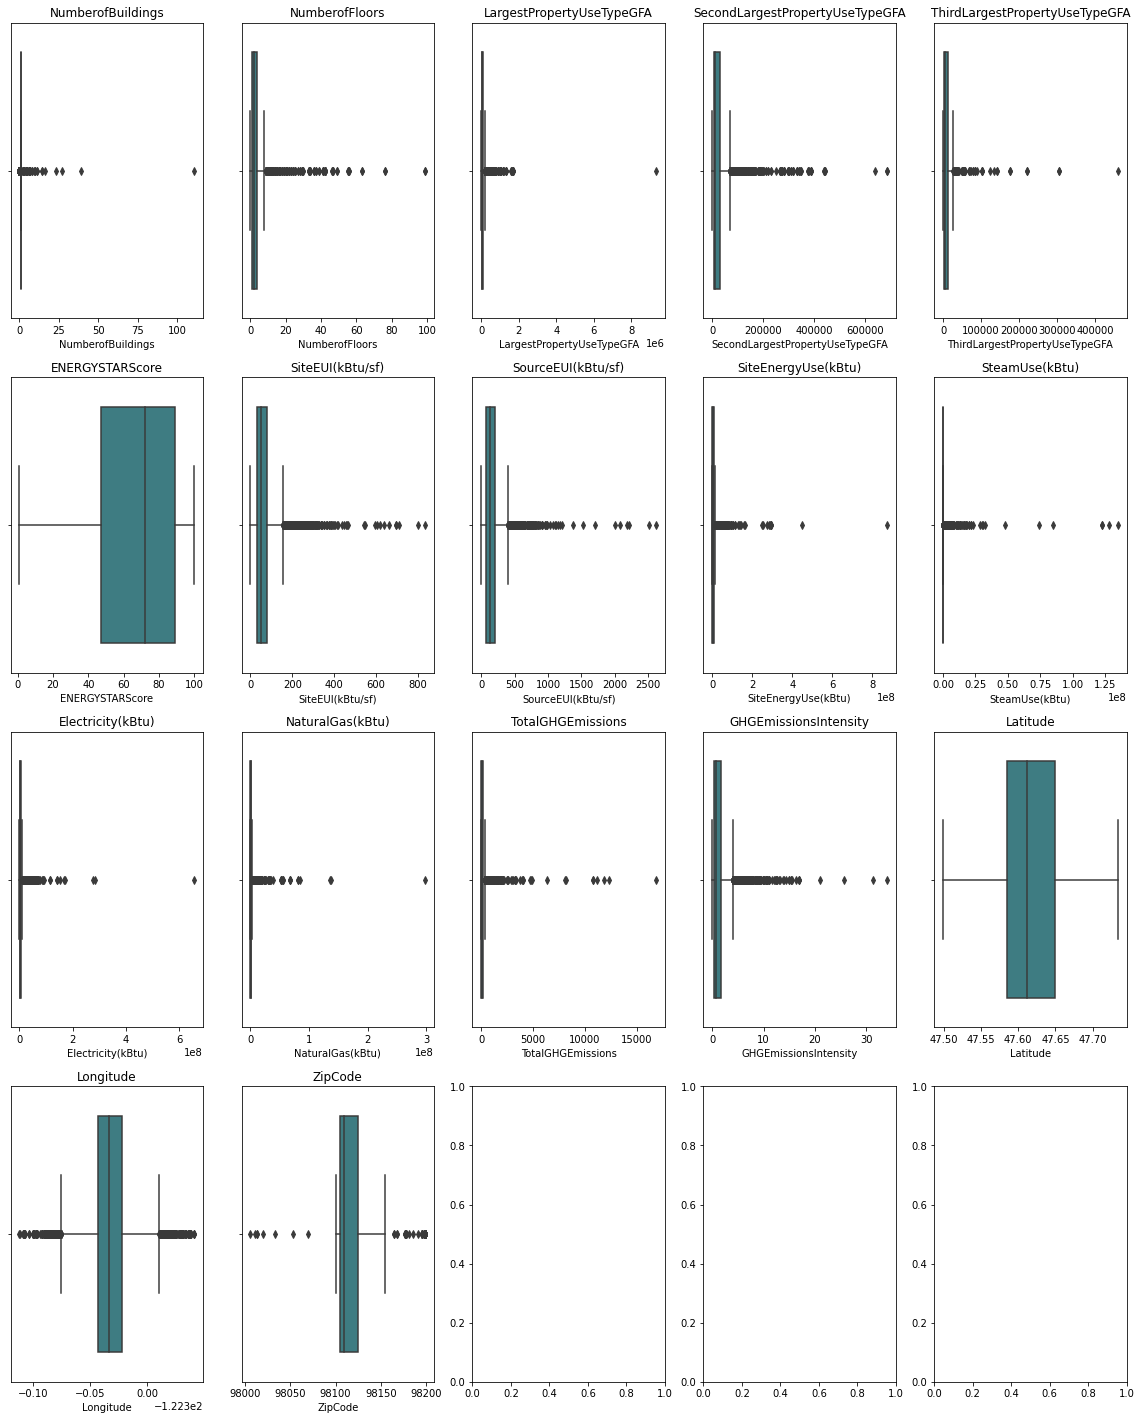

In [117]:
fig, axes = plt.subplots(4,5, figsize=(20,25))
y=0
for col in cols:
    i,j = divmod(y,5)
    sns.boxplot(ax = axes[i,j], x=energy_2015_2016[col], orient='h',palette='crest')
    
    axes[i,j].set_title(col)   
    y=y+1

In [118]:
energy_2015_2016['NumberofBuildings'].value_counts(dropna = False)

1.0      3198
0.0        52
2.0        15
3.0        14
5.0         8
6.0         6
4.0         5
7.0         4
10.0        2
8.0         2
NaN         2
14.0        2
11.0        2
111.0       1
27.0        1
39.0        1
9.0         1
23.0        1
16.0        1
Name: NumberofBuildings, dtype: int64

## Vérification du nombre maximum des batiments

In [119]:
energy_2015_2016[energy_2015_2016['NumberofBuildings'] > 38][['NumberofBuildings','OSEBuildingID','NumberofFloors','PropertyName','PrimaryPropertyType','ZipCode']]

,NumberofBuildings,OSEBuildingID,NumberofFloors,PropertyName,PrimaryPropertyType,ZipCode
1508,39.0,22062,2.0,SEATTLE UNIVERSITY (MAIN CAMPUS),College/University,98122.0
3274,111.0,49967,0.0,University of Washington - Seattle Campus,University,98105.0


   On remarque que l'outlier représenté sur le boxplot pour numberofbuildings est une université. 

In [120]:
energy_2015_2016[energy_2015_2016.NumberofBuildings.isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,0939000245,7,DOWNTOWN,1924,NaN,4.0,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,47.60380,-122.33293,215 COLUMBIA ST,Seattle,WA,98104.0
2670,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING,8816401120,4,NORTHEAST,1928,NaN,2.0,20760,0,20760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,47.66182,-122.31345,4515 UNIVERSITY WAY NE,Seattle,WA,98105.0


In [121]:
energy_2015_2016[energy_2015_2016.NumberofBuildings==0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
63,89,2016,NonResidential,Medical Office,Polyclinic North && South,1978201270,3,EAST,1965,0.0,3.0,179014,0,179014,Medical Office,Medical Office,179014.0,NaN,NaN,NaN,NaN,48.0,93.300003,213.399994,1.670106e+07,0.000000e+00,9886484.0,6814570.0,430.84,2.41,False,Compliant,47.612440,-122.321400,1200 Harvard Ave,Seattle,WA,98122.0
76,113,2016,NonResidential,Small- and Mid-Sized Office,KCTS9,1988200705,7,MAGNOLIA / QUEEN ANNE,1986,0.0,2.0,66240,2352,63888,"Data Center, Distribution Center, Office, Park...",Office,45900.0,Data Center,5181.0,Distribution Center,4551.0,NaN,74.900002,235.199997,4.166306e+06,0.000000e+00,4166305.0,0.0,29.04,0.44,False,Compliant,47.623910,-122.348370,401 Mercer St,Seattle,WA,98109.0
160,257,2016,NonResidential,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,7666703020,1,GREATER DUWAMISH,1916,0.0,4.0,79600,0,79600,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,79600.0,NaN,NaN,NaN,NaN,34.0,30.299999,95.099998,2.411402e+06,0.000000e+00,2411402.0,0.0,16.81,0.21,False,Compliant,47.575070,-122.357470,3235 16TH AVE SW,Seattle,WA,98134.0
201,322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),0656000005,7,DOWNTOWN,1968,0.0,3.0,100734,26731,74003,Office,Office,100734.0,NaN,NaN,NaN,NaN,20.0,97.199997,305.100006,9.788717e+06,0.000000e+00,9788716.0,0.0,68.24,0.68,False,Compliant,47.617570,-122.351220,2801 3rd Ave,Seattle,WA,98121.0
241,366,2016,NonResidential,Small- and Mid-Sized Office,University District Office Buiding,1142000500,4,NORTHEAST,1961,0.0,5.0,99005,0,99005,Office,Office,79555.0,NaN,NaN,NaN,NaN,70.0,59.400002,137.600006,4.728488e+06,0.000000e+00,2863212.0,1865277.0,119.03,1.20,False,Compliant,47.661000,-122.316260,1107 NE 45th St,Seattle,WA,98105.0
264,391,2016,NonResidential,Mixed Use Property,Thaw Building,0007400015,2,GREATER DUWAMISH,1970,0.0,1.0,88400,0,88400,"Distribution Center, Non-Refrigerated Warehous...",Non-Refrigerated Warehouse,33450.0,Office,29620.0,Distribution Center,27715.0,42.0,48.299999,109.000000,4.383100e+06,0.000000e+00,2530658.0,1852442.0,116.03,1.31,False,Compliant,47.528710,-122.294430,8300 Military Rd South,Seattle,WA,98108.0
278,408,2016,NonResidential,Large Office,Fourth and Pike Building,1975700235,7,DOWNTOWN,1926,0.0,10.0,132326,0,132326,"Office, Other, Retail Store",Office,92006.0,Other,12610.0,Retail Store,9835.0,72.0,52.700001,159.800003,6.029020e+06,3.282471e+05,5698221.0,2551.0,65.20,0.49,False,Compliant,47.610050,-122.336100,1424 4th Ave,Seattle,WA,98101.0
280,410,2016,NonResidential,Hotel,Motif Seattle,1975700255,7,DOWNTOWN,1973,0.0,19.0,332067,59280,272787,Hotel,Hotel,332067.0,NaN,NaN,NaN,NaN,6.0,113.800003,251.300003,3.778555e+07,1.558601e+07,19800542.0,2398995.0,1468.50,4.42,False,Compliant,47.609960,-122.335720,1414 4th Ave,Seattle,WA,98101.0
291,421,2016,NonResidential,Other,Meridian (East),1976700055,7,DOWNTOWN,1996,0.0,4.0,267335,166960,100375,"Movie Theater, Other - Restaurant/Bar, Parking",Parking,166960.0,Movie Theater,69947.0,Other - Restaurant/Bar,27400.0,NaN,74.699997,189.399994,7.273156e+06,0.000000e+00,5169902.0,2103253.0,147.75,0.55,False,Compliant,47.611850,-122.334210,1501 7th Ave,Seattle,WA,98101.0
358,504,2016,Nonresidential COS,Other,Westbridge,1824049020,1,DELRIDGE,1955,0.0,1.0,113780,0,113780,"Office, Other - Services",Other - Services,91532.0,Office,22248.0,NaN

Dans le cas où NumberofBuildings est NaN ou 0, on remplace par la valeur 1 car il contient des étages

In [122]:
energy_2015_2016['NumberofBuildings'].fillna(1,inplace=True)

In [123]:
energy_2015_2016['NumberofBuildings'] =  energy_2015_2016['NumberofBuildings'].replace([0],1)

## Vérification du nombre maximum des étages

In [124]:
energy_2015_2016['NumberofFloors'].value_counts(dropna = False)

1.0     915
2.0     788
3.0     541
4.0     295
5.0     202
6.0     167
7.0      67
8.0      43
11.0     36
10.0     35
0.0      21
14.0     17
12.0     16
9.0      16
15.0     13
13.0     13
42.0     10
19.0     10
17.0      8
NaN       8
21.0      6
29.0      6
22.0      6
25.0      6
16.0      6
33.0      6
18.0      6
20.0      6
24.0      6
23.0      5
34.0      4
36.0      4
41.0      4
39.0      2
46.0      2
30.0      2
28.0      2
56.0      2
27.0      2
76.0      2
47.0      2
49.0      2
37.0      2
63.0      2
55.0      2
99.0      2
Name: NumberofFloors, dtype: int64

Le bâtiment plus le plus haut de Seattle contient 76 étages.

In [125]:
energy_2015_2016[energy_2015_2016['NumberofFloors'] > 76][['OSEBuildingID','NumberofFloors','PropertyName','PrimaryPropertyType']]


,OSEBuildingID,NumberofFloors,PropertyName,PrimaryPropertyType
1359,21611,99.0,Seattle Chinese Baptist Church,Worship Facility
1371,21611,99.0,CHINESE BAPTIST CHURCH,Worship Facility


La Seattle Chinese Baptist Church ici est une église avec un étage par rapport au map google.

On remplace donc le 99 par 1

In [126]:
energy_2015_2016['NumberofFloors'] =  energy_2015_2016['NumberofFloors'].replace([99],1)

In [127]:
energy_2015_2016[energy_2015_2016['NumberofFloors'].isnull()][['OSEBuildingID','NumberofFloors', 'NumberofBuildings', 'PrimaryPropertyType']]

,OSEBuildingID,NumberofFloors,NumberofBuildings,PrimaryPropertyType
2015,24086,NaN,10.0,Other
3171,40028,NaN,1.0,Non-Refrigerated Warehouse
3172,40031,NaN,1.0,Medical Office
3173,40034,NaN,1.0,Medical Office
3193,43948,NaN,1.0,Other
3209,49705,NaN,7.0,Other
3311,49958,NaN,1.0,Other
3313,49966,NaN,1.0,Other


On supprime les quelques lignes où le NumberofFloors sont nans.



In [128]:
energy_2015_2016 = energy_2015_2016[energy_2015_2016['NumberofFloors'].notna()]

## Vérification des valeurs négatives

In [129]:
energy_2015_2016.min()

OSEBuildingID                                       1
DataYear                                         2015
BuildingType                                   Campus
PrimaryPropertyType                College/University
PropertyName                         #4706 Bitterlake
TaxParcelIdentificationNumber              0000000000
CouncilDistrictCode                                 1
Neighborhood                                  BALLARD
YearBuilt                                        1900
NumberofBuildings                                   1
NumberofFloors                                      0
PropertyGFATotal                                11285
PropertyGFAParking                                 -2
PropertyGFABuilding(s)                         -50550
LargestPropertyUseTypeGFA                        5656
SecondLargestPropertyUseTypeGFA                     0
ThirdLargestPropertyUseTypeGFA                      0
ENERGYSTARScore                                     1
SiteEUI(kBtu/sf)            

On supprime les propriétés dont le parking et PropertyGFABuilding sont négatives

In [130]:
energy_2015_2016[energy_2015_2016['PropertyGFAParking'] < 0][['PropertyGFAParking','OSEBuildingID','NumberofFloors','PropertyName','PrimaryPropertyType']]

,PropertyGFAParking,OSEBuildingID,NumberofFloors,PropertyName,PrimaryPropertyType
3136,-2,29551,11.0,625 5TH AVE S,Small- and Mid-Sized Office


In [131]:
energy_2015_2016 = energy_2015_2016.drop(energy_2015_2016[(energy_2015_2016['PropertyGFAParking'] < 0)].index)

In [132]:
energy_2015_2016[energy_2015_2016['PropertyGFABuilding(s)'] < 0][['PropertyGFAParking','OSEBuildingID','NumberofFloors','PropertyName','PrimaryPropertyType']]

,PropertyGFAParking,OSEBuildingID,NumberofFloors,PropertyName,PrimaryPropertyType
3139,97325,29788,5.0,QUEEN ANNE SQUARE WEST (2013),Small- and Mid-Sized Office
3322,84198,50002,3.0,FREEWAY MOTORS UNIVERSITY AUDI,Other


In [133]:
energy_2015_2016 = energy_2015_2016.drop(energy_2015_2016[(energy_2015_2016['PropertyGFABuilding(s)'] < 0)].index)

In [134]:
energy_2015_2016[energy_2015_2016['TotalGHGEmissions'] < 0][['PropertyGFAParking','OSEBuildingID','NumberofFloors','PropertyName','PrimaryPropertyType','TotalGHGEmissions']]

,PropertyGFAParking,OSEBuildingID,NumberofFloors,PropertyName,PrimaryPropertyType,TotalGHGEmissions
3206,0,49784,6.0,Bullitt Center,Small- and Mid-Sized Office,-0.8


In [135]:
energy_2015_2016 = energy_2015_2016.drop(energy_2015_2016[(energy_2015_2016['TotalGHGEmissions'] < 0)].index)

In [136]:
energy_2015_2016[energy_2015_2016['SourceEUI(kBtu/sf)'] < 0][['PropertyGFAParking','OSEBuildingID','NumberofFloors','PropertyName','PrimaryPropertyType','TotalGHGEmissions']]

,PropertyGFAParking,OSEBuildingID,NumberofFloors,PropertyName,PrimaryPropertyType,TotalGHGEmissions
3246,0,49784,6.0,BULLITT CENTER,Small- and Mid-Sized Office,3.92


In [137]:
energy_2015_2016 = energy_2015_2016.drop(energy_2015_2016[(energy_2015_2016['SourceEUI(kBtu/sf)'] < 0)].index)

In [138]:
energy_2015_2016.shape

(3302, 38)

## Imputation des nans

In [139]:
df = pd.DataFrame()
sum_missing_values = energy_2015_2016.isnull().sum()
percentage = 100 * sum_missing_values / len(energy_2015_2016)
df['% Missing Values'] = percentage.round(2)
df.style.background_gradient(axis=0, cmap='PuBuGn')

,% Missing Values
OSEBuildingID,0.000000
DataYear,0.000000
BuildingType,0.000000
PrimaryPropertyType,0.000000
PropertyName,0.000000
TaxParcelIdentificationNumber,0.000000
CouncilDistrictCode,0.000000
Neighborhood,0.000000
YearBuilt,0.000000
NumberofBuildings,0.000000


In [140]:
energy_2015_2016[energy_2015_2016['ListOfAllPropertyUseTypes'].isna()][['PrimaryPropertyType','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]

,PrimaryPropertyType,LargestPropertyUseTypeGFA,PropertyGFATotal,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
10,Hotel,NaN,153163,133884,NaN,NaN,NaN,NaN
14,Hotel,NaN,67390,67390,NaN,NaN,NaN,NaN
19,Hotel,NaN,104352,104352,NaN,NaN,NaN,NaN
35,Distribution Center,NaN,714095,714095,NaN,NaN,NaN,NaN
52,Hotel,NaN,113173,70627,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2716,Mixed Use Property,NaN,20880,20880,NaN,NaN,NaN,NaN
2776,SPS-District K-12,NaN,49234,49234,NaN,NaN,NaN,NaN
2932,Worship Facility,NaN,26373,26373,NaN,NaN,NaN,NaN
2999,Hotel,NaN,392552,370327,NaN,NaN,NaN,NaN


In [141]:
##energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Hospital"][['PrimaryPropertyType','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Hotel"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Worship Facility"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="SPS-District K-12"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Distribution Center"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Large Office"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Retail Store"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Small- and Mid-Sized Office"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Laboratory"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Restaurant"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Supermarket/Grocery Store"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
#energy_2015_2016[energy_2015_2016['PrimaryPropertyType']=="Non-Refrigerated Warehouse"][['PrimaryPropertyType','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]


Supprimer les lignes qui contiennent Mixed Use Property et SPS-District K-12

In [142]:
energy_2015_2016.drop(energy_2015_2016.index[(energy_2015_2016['PrimaryPropertyType']=="Mixed Use Property")&(energy_2015_2016['LargestPropertyUseType'].isna())], inplace=True)
energy_2015_2016.drop(energy_2015_2016.index[(energy_2015_2016['PrimaryPropertyType']=="SPS-District K-12")&(energy_2015_2016['LargestPropertyUseType'].isna())], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Replace LargestPropertyUseType where nans with PrimaryPropertyType

In [143]:
energy_2015_2016['LargestPropertyUseType'] = energy_2015_2016['LargestPropertyUseType'].fillna(energy_2015_2016['PrimaryPropertyType'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



On remplace les Large, small, mid-size office par office

In [144]:
energy_2015_2016['LargestPropertyUseType'] = energy_2015_2016['LargestPropertyUseType'].replace('Large Office', 'Office')
energy_2015_2016['LargestPropertyUseType'] = energy_2015_2016['LargestPropertyUseType'].replace('Small- and Mid-Sized Office', 'Office')
energy_2015_2016['LargestPropertyUseType'] = energy_2015_2016['LargestPropertyUseType'].replace('Hospital', 'Hospital (General Medical & Surgical)')

On remplace les nans par Nothing

In [145]:
energy_2015_2016['SecondLargestPropertyUseType'] = energy_2015_2016['SecondLargestPropertyUseType'].replace(np.nan, 'Nothing')
energy_2015_2016['ThirdLargestPropertyUseType'] = energy_2015_2016['ThirdLargestPropertyUseType'].replace(np.nan, 'Nothing')

On remplace les nans des SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA par 0

In [146]:
cols_GFA = ['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']
energy_2015_2016[cols_GFA] = energy_2015_2016[cols_GFA].fillna(0)

On remplace les nans de LargestPropertyUseTypeGFA en calculant: 

 PropertyGFATotal - SecondLargestPropertyUseTypeGFA - ThirdLargestPropertyUseTypeGFA

In [147]:
energy_2015_2016[energy_2015_2016['LargestPropertyUseTypeGFA'].isna()][['PropertyGFATotal', 'PropertyGFABuilding(s)',
                                                    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']]

,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
10,153163,133884,NaN,0.0,0.0
14,67390,67390,NaN,0.0,0.0
19,104352,104352,NaN,0.0,0.0
35,714095,714095,NaN,0.0,0.0
52,113173,70627,NaN,0.0,0.0
...,...,...,...,...,...
2703,20760,20760,NaN,0.0,0.0
2932,26373,26373,NaN,0.0,0.0
2999,392552,370327,NaN,0.0,0.0
3300,50319,50319,NaN,0.0,0.0


Vu que SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA sont 0, on remplace les nans directement avec le PropertyGFATotal

In [148]:
energy_2015_2016['LargestPropertyUseTypeGFA'] = energy_2015_2016['LargestPropertyUseTypeGFA'].fillna(energy_2015_2016['PropertyGFATotal'])

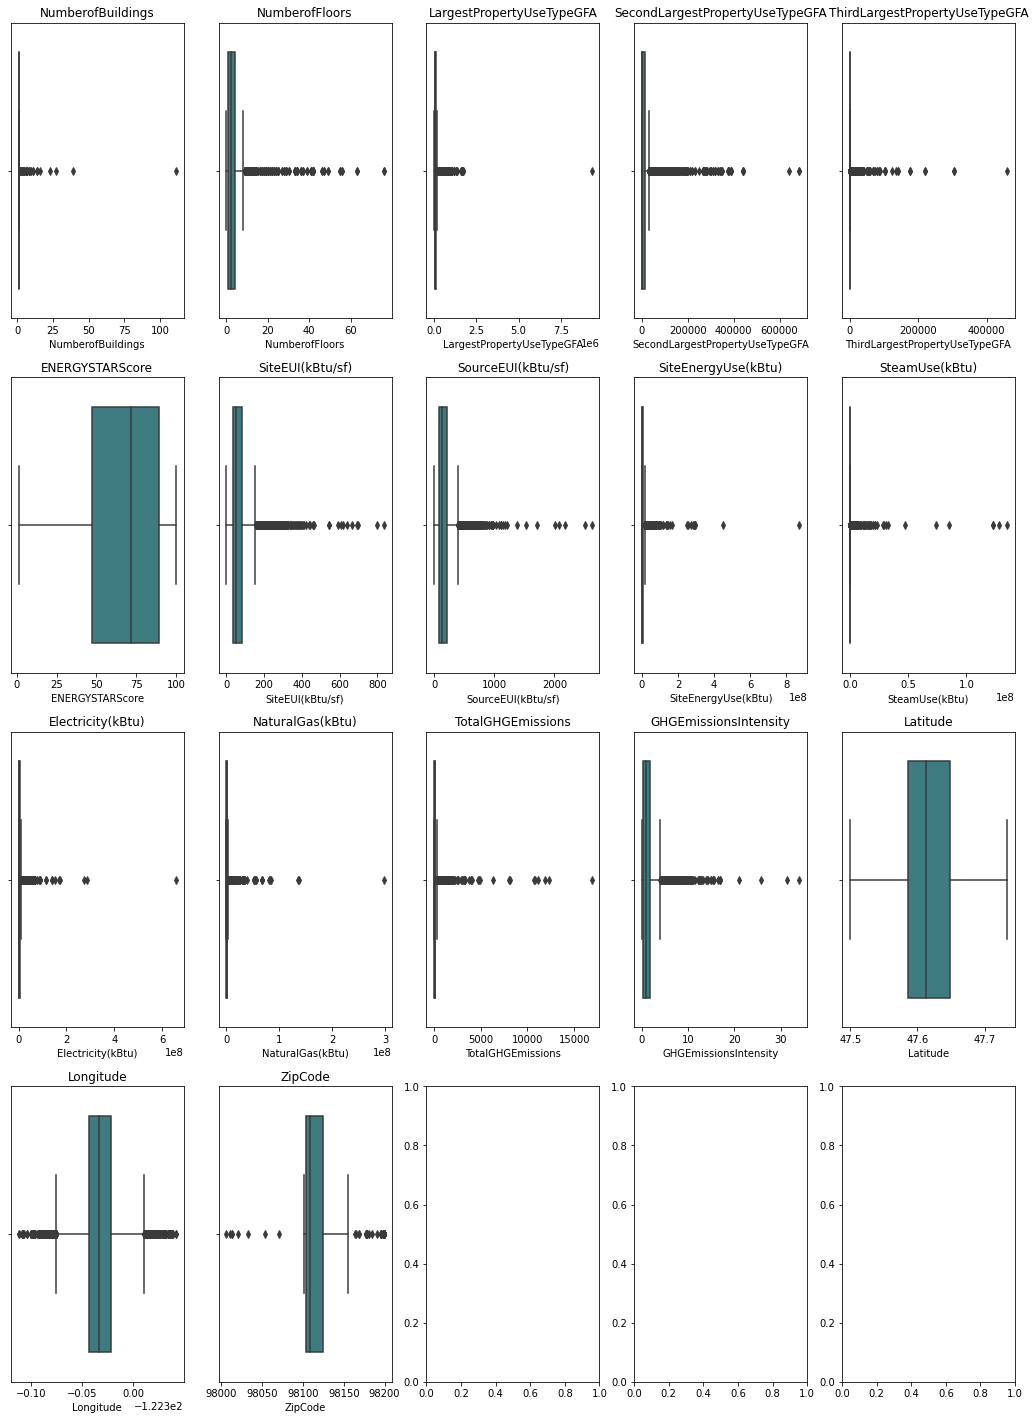

In [149]:
fig, axes = plt.subplots(4,5, figsize=(18,25))
y=0
for col in cols:
    i,j = divmod(y,5)
    sns.boxplot(ax = axes[i,j], x=energy_2015_2016[col], orient='h', palette='crest')
    
    axes[i,j].set_title(col)   
    y=y+1

In [150]:
energy_2015_2016['PropertyGFATotal'] = energy_2015_2016[['PropertyGFATotal']].astype('float64')

In [151]:
energy_2015_2016[((energy_2015_2016['PropertyGFAParking'] > energy_2015_2016['PropertyGFATotal']))]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode


In [152]:
#Vérification où LargestPropertyUseTypeGFA est plus que PropertyGFATotal
energy_2015_2016[((energy_2015_2016['LargestPropertyUseTypeGFA'] > energy_2015_2016['PropertyGFATotal']))]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890.0,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.100000,228.800000,1.482910e+07,0.0,6066245.0,8763105.0,507.70,4.02,False,Compliant,47.613754,-122.340924,401 LENORA ST,Seattle,WA,98121.0
11,16,2015,NonResidential,Hotel,W SEATTLE HOTEL,942000165,7,DOWNTOWN,1998,1.0,25.0,333176.0,61161,272015,Hotel,Hotel,336640.0,Nothing,0.0,Nothing,0.0,32.0,82.300000,207.200000,2.771703e+07,5426396.0,19058722.0,3232700.0,723.40,1.93,False,Compliant,47.607182,-122.333472,1112 4TH AVE,Seattle,WA,98101.0
11,16,2016,NonResidential,Hotel,5679-W Seattle,0942000165,7,DOWNTOWN,1998,1.0,25.0,333176.0,61161,272015,Hotel,Hotel,336640.0,Nothing,0.0,Nothing,0.0,36.0,80.000000,199.000000,2.694111e+07,5999360.5,18083049.0,2858700.0,740.97,2.22,False,Compliant,47.607130,-122.333230,1112 Fourth Avenue,Seattle,WA,98101.0
22,28,2015,SPS-District K-12,K-12 School,GRAHAM HILL ELEMENTARY SCHOOL (SPS-DISTRICT),1102000138,2,SOUTHEAST,1961,1.0,2.0,56228.0,0,56228,K-12 School,K-12 School,58320.0,Nothing,0.0,Nothing,0.0,96.0,25.100000,59.200000,1.454222e+06,0.0,911659.0,542600.0,35.17,0.56,True,Compliant,47.545701,-122.268584,5101 S GRAHAM ST,Seattle,WA,98118.0
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,1102000138,2,SOUTHEAST,1961,1.0,2.0,56228.0,0,56228,K-12 School,K-12 School,58916.0,Nothing,0.0,Nothing,0.0,95.0,26.100000,60.700001,1.539478e+06,0.0,936955.0,602523.0,38.53,0.69,True,Error - Correct Default Data,47.545760,-122.268530,5149 S. Graham St.,Seattle,WA,98118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,1979200210,3,EAST,1920,1.0,8.0,374466.0,0,374466,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1010135.0,Nothing,0.0,Nothing,0.0,74.0,162.300003,367.899994,1.639460e+08,73885472.0,90060497.0,0.0,6330.91,16.91,False,Compliant,47.609860,-122.327740,925 Seneca St.,Seattle,WA,98101.0
3294,50002,2016,NonResidential,Other,Audi Seattle UVA Bldg,6746701515,4,NORTHEAST,2014,1.0,3.0,33648.0,0,33648,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,Nothing,0.0,NaN,35.900002,112.699997,1.399582e+06,0.0,1399582.0,0.0,9.76,0.29,False,Compliant,47.664140,-122.316640,4741 11TH AVE NE,Seattle,WA,98105.0
3319,50035,2016,NonResidential,Hotel,Hilton Garden Inn Seattle,3374400010,7,DOWNTOWN,2015,1.0,14.0,144614.0,0,144614,Hotel,Hotel,159500.0,Nothing,0.0,Nothing,0.0,89.0,34.599998,105.400002,5.525072e+06,0.0,5269208.0,255864.0,50.32,0.35,False,Compliant,47.616650,-122.332610,1821 Boren Ave,Seattle,WA,98101.0
3347,50081,2016,NonResidential,K-12 School,Hamlin Robinson School,7548300840,3,GREATER DUWAMISH,2015,1.0,3.0,45000.0,0,45000,"K-12 School, Parking",K-12 School,45728.0,Parking,0.0,Nothing,0.0,77.0,29.000000,91.099998,1.325973e+06,0.0,1325973.0,0.0,9.24,0.21,False,Compliant,47.588310,-122.306500,1701 20th Ave South,Seattle,WA,98144.0


In [153]:
# Supprimer les valeurs abérrantes où LargestPropertyUseTypeGFA est plus que PropertyGFATotal
energy_clean =  energy_2015_2016[~((energy_2015_2016['LargestPropertyUseTypeGFA'] > energy_2015_2016['PropertyGFATotal']))]
print(energy_clean.shape)

(2878, 38)


In [154]:
#On vérifie le total GFA qui sont pas égale à PropertyGFABuilding(s) + PropertyGFAParking
energy_clean[energy_clean['PropertyGFATotal'] != (energy_clean['PropertyGFABuilding(s)'] + energy_clean['PropertyGFAParking'])]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode


In [155]:
#On vérifie le SiteEnergyUseWN qui sont 0 ou négatives

energy_clean[(energy_clean['SiteEnergyUse(kBtu)'] < 1 )]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
28,34,2016,SPS-District K-12,K-12 School,Meany Building,0688000090,3,CENTRAL,1955,1.0,1.0,126351.0,0,126351,K-12 School,K-12 School,126351.0,Nothing,0.0,Nothing,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,False,Missing Data,47.622660,-122.305470,301/300 21st Ave. E.,Seattle,WA,98112.0
44,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1975700365,7,DOWNTOWN,1920,1.0,2.0,57428.0,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,Other,9783.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,False,Compliant,47.610764,-122.337677,1525 4TH AVE,Seattle,WA,98101.0
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,1931301145,6,LAKE UNION,1991,1.0,3.0,66588.0,0,66588,K-12 School,K-12 School,66588.0,Nothing,0.0,Nothing,0.0,NaN,0.0,0.0,0.0,0.0,2104286.0,0.0,14.67,0.22,False,Missing Data,47.654640,-122.349120,3921 Linden Ave. N.,Seattle,WA,98103.0
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,3526039131,6,BALLARD,1959,1.0,1.0,160270.0,0,160270,K-12 School,K-12 School,160270.0,Nothing,0.0,Nothing,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4318917.0,229.38,1.43,False,Missing Data,47.696750,-122.377600,9201 15th Ave. NW.,Seattle,WA,98117.0
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,3646100540,3,CENTRAL,1963,1.0,3.0,136188.0,0,136188,K-12 School,K-12 School,136188.0,Nothing,0.0,Nothing,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3217877.0,170.90,1.25,False,Missing Data,47.597960,-122.304150,2101 S. Jackson,Seattle,WA,98144.0
304,435,2016,NonResidential,Other,Washington State Convention Center,1978200105,7,DOWNTOWN,1990,1.0,6.0,1400000.0,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,Nothing,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.00,False,Non-Compliant,47.611950,-122.331670,705 Pike St,Seattle,WA,98101.0
572,765,2015,NonResidential,Large Office,SEATTLE TOWER,1975200005,7,DOWNTOWN,1929,1.0,27.0,216571.0,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,Other - Technology/Science,6246.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,False,Compliant,47.607655,-122.335512,1218 3RD AVE,Seattle,WA,98101.0
614,820,2016,SPS-District K-12,K-12 School,Bailey Gatzert Elementary,0007600137,3,CENTRAL,1988,1.0,1.0,52924.0,0,52924,K-12 School,K-12 School,52924.0,Nothing,0.0,Nothing,0.0,NaN,0.0,0.0,0.0,0.0,1957268.0,0.0,13.64,0.26,False,Missing Data,47.601200,-122.315480,1301 E. Yesler Way,Seattle,WA,98122.0
630,850,2016,SPS-District K-12,K-12 School,Leschi Elementary,3416600240,3,CENTRAL,1988,1.0,3.0,55353.0,0,55353,K-12 School,K-12 School,55353.0,Nothing,0.0,Nothing,0.0,NaN,0.0,0.0,0.0,0.0,1433596.0,0.0,9.99,0.18,False,Missing Data,47.602100,-122.291810,135 32nd Ave.,Seattle,WA,98122.0
746,19776,2016,NonResidential,Other,Welcome Home Society - PriceCo,0164000020,5,NORTHWEST,2002,1.0,1.0,29924.0,0,29924,Other - Education,Other - Education,29924.0,Nothing,0.0,Nothing,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,False,Missing Data,47.727770,-122.345030,13537 Aurora Ave N,Seattle,WA,98133.0


In [156]:
energy_clean = energy_clean.drop(energy_clean[(energy_clean['SiteEnergyUse(kBtu)'] < 1 )].index)

In [157]:
#On vérifie le TotalGHGEmissions qui sont 0 ou négatives

energy_clean[(energy_clean.TotalGHGEmissions < 1)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
513,700,2016,NonResidential,Store,IUC- Whole Foods Interbay,7666201460,7,MAGNOLIA / QUEEN ANNE,2008,1.0,1.0,57176.0,0,57176,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,39500.0,Retail Store,15000.0,"Personal Services (Health/Beauty, Dry Cleaning...",5500.0,31.0,208.800003,0.000000,1.252517e+07,0.0,0.0,0.0,0.00,0.00,False,Compliant,47.637180,-122.377340,2001 15th Avenue West,Seattle,WA,98119.0
599,797,2015,NonResidential,Refrigerated Warehouse,SEATTLE COLD STORAGE,5367204100,2,GREATER DUWAMISH,1969,1.0,1.0,71718.0,0,71718,NaN,Refrigerated Warehouse,71718.0,Nothing,0.0,Nothing,0.0,NaN,0.900000,2.900000,9.380200e+04,0.0,93806.0,0.0,0.65,0.00,False,Compliant,47.543298,-122.330878,303 S RIVER ST,Seattle,WA,98108.0
702,19656,2015,NonResidential,Small- and Mid-Sized Office,1916 Boren Building,660002170,7,DOWNTOWN,1929,1.0,3.0,21600.0,0,21600,Office,Office,21600.0,Nothing,0.0,Nothing,0.0,NaN,6.200000,19.500000,1.338800e+05,0.0,133885.0,0.0,0.93,0.02,False,Compliant,47.617539,-122.332782,1916 BOREN AVE,Seattle,WA,98101.0
987,20396,2015,NonResidential,Non-Refrigerated Warehouse,MEAVES BUILDING,939000530,7,DOWNTOWN,1900,1.0,5.0,33300.0,0,33300,"Non-Refrigerated Warehouse, Retail Store",Non-Refrigerated Warehouse,24000.0,Retail Store,6000.0,Nothing,0.0,NaN,4.400000,13.800000,1.318100e+05,0.0,131815.0,0.0,0.92,0.01,False,Compliant,47.604853,-122.336129,1012 1ST AVE,Seattle,WA,98104.0
974,20396,2016,NonResidential,Warehouse,Meaves Building,0939000530,7,DOWNTOWN,1900,1.0,5.0,33300.0,0,33300,"Non-Refrigerated Warehouse, Retail Store",Non-Refrigerated Warehouse,24000.0,Retail Store,6000.0,Nothing,0.0,NaN,3.000000,9.500000,9.055870e+04,0.0,90559.0,0.0,0.63,0.02,False,Compliant,47.605280,-122.336270,1014 First Avenue,Seattle,WA,98101.0
1039,20541,2015,NonResidential,Other,MYCON'S USED CARS,1624049229,2,SOUTHEAST,1963,1.0,2.0,20047.0,0,20047,Other - Services,Other - Services,20047.0,Nothing,0.0,Nothing,0.0,NaN,5.400000,17.100000,1.090140e+05,0.0,109018.0,0.0,0.76,0.01,False,Compliant,47.570126,-122.292111,3711 RAINIER AVE S,Seattle,WA,98144.0
1027,20541,2016,NonResidential,Other,(ID20541) MYCON'S USED CARS,1624049229,2,SOUTHEAST,1963,1.0,2.0,20047.0,0,20047,Other - Services,Other - Services,20047.0,Nothing,0.0,Nothing,0.0,NaN,5.900000,18.400000,1.174384e+05,0.0,117438.0,0.0,0.82,0.04,False,Compliant,47.569790,-122.292340,3711 RAINIER AVE S,Seattle,WA,98144.0
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1975700135,7,DOWNTOWN,1903,1.0,3.0,57720.0,0,57720,Office,Office,25000.0,Nothing,0.0,Nothing,0.0,NaN,1.000000,3.000000,2.410550e+04,0.0,24105.0,0.0,0.17,0.00,False,Non-Compliant,47.611190,-122.335810,1520 Fifth Ave,Seattle,WA,98101.0
1239,21315,2015,NonResidential,Small- and Mid-Sized Office,1518 5TH AVE OFFICE,1975700135,7,DOWNTOWN,1903,1.0,3.0,57720.0,0,57720,Office,Office,25000.0,Nothing,0.0,Nothing,0.0,100.0,1.800000,5.500000,4.394300e+04,0.0,43945.0,0.0,0.31,0.00,False,Compliant,47.611309,-122.335723,1520 5TH AVE,Seattle,WA,98101.0
1306,21474,2015,NonResidential,Other,SULTAN HOTEL/LUSTY LADY,1976200060,7,DOWNTOWN,1900,1.0,3.0,49760.0,0,49760,Other,Other,24019.0,Nothing,0.0,Nothing,0.0,NaN,1.000000,3.200000,2.412600e+04,0.0,24127.0,0.0,0.17,0.00,False,Compliant,47.607051,-122.339036,1315 1ST AVE,Seattle,WA,98101.0


In [158]:
energy_clean = energy_clean.drop(energy_clean[(energy_clean.TotalGHGEmissions < 1)].index)

In [159]:
#On vérifie le SourceEUIWN qui sont 0 ou négatives

energy_clean[(energy_clean['SourceEUI(kBtu/sf)'] < 1)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
2791,26973,2016,NonResidential,Mixed Use Property,New Central,6054550000,2,DOWNTOWN,1909,1.0,3.0,49299.0,0,49299,"Multifamily Housing, Office, Restaurant",Office,24099.0,Multifamily Housing,23632.0,Restaurant,5320.0,NaN,89.199997,0.0,4729846.5,0.0,1323792.0,0.0,9.23,0.19,False,Compliant,47.59737,-122.32487,657 South Weller Street,Seattle,WA,98104.0


In [160]:
energy_clean = energy_clean.drop(energy_clean[(energy_clean['SourceEUI(kBtu/sf)'] < 1)].index)

In [161]:
energy_2015_2016[((energy_2015_2016['PropertyGFAParking'] > energy_2015_2016['PropertyGFATotal']))]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode


#Suppression des colonnes et lignes non pertinentes

In [162]:
col_a_supprimer = ['TaxParcelIdentificationNumber', 'DefaultData', 'ListOfAllPropertyUseTypes', 'CouncilDistrictCode','PropertyName']

In [163]:
energy_clean = energy_clean.drop(col_a_supprimer, axis=1)

In [164]:
energy_clean[energy_clean['TotalGHGEmissions'].isna()]


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
62,87,2015,SPS-District K-12,K-12 School,SOUTHWEST,1948,1.0,2.0,53352.0,0,53352,K-12 School,53352.0,Nothing,0.0,Nothing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,47.509354,-122.378222,3701 SW 104TH ST,Seattle,WA,98146.0
578,773,2016,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1924,1.0,4.0,63150.0,0,63150,Office,63150.0,Nothing,0.0,Nothing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Compliant,47.603800,-122.332930,215 COLUMBIA ST,Seattle,WA,98104.0
1358,21570,2015,SPS-District K-12,K-12 School,NORTH,1950,1.0,1.0,34005.0,0,34005,K-12 School,34005.0,Nothing,0.0,Nothing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,47.713343,-122.314590,11530 12TH AVE NE,Seattle,WA,98125.0
1360,21578,2015,SPS-District K-12,K-12 School,SOUTHWEST,1949,1.0,1.0,41221.0,0,41221,K-12 School,41221.0,Nothing,0.0,Nothing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,47.565464,-122.396881,5012 SW GENESEE ST,Seattle,WA,98116.0
2108,24408,2015,SPS-District K-12,K-12 School,NORTHWEST,1953,1.0,1.0,110830.0,0,110830,K-12 School,110830.0,Nothing,0.0,Nothing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,47.695489,-122.340188,1330 N 90TH ST,Seattle,WA,98103.0
2406,25451,2015,NonResidential,Restaurant,LAKE UNION,1978,1.0,2.0,26519.0,0,26519,Restaurant,13592.0,Office,12927.0,Nothing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compliant,47.629180,-122.331695,1001 FAIRVIEW AVE N,Seattle,WA,98109.0


On supprime les TotalGHGEmissions contenant des nans

In [165]:
TotalGHGEmissions = energy_clean['TotalGHGEmissions'].index[energy_clean['TotalGHGEmissions'].isnull()]

energy_clean = energy_clean.drop(index=TotalGHGEmissions)

In [166]:
energy_clean.shape

(2801, 33)

On supprime les Outliers

On supprime la ligne contenant 111 batiments

In [167]:
energy_clean = energy_clean.drop(energy_clean[(energy_clean['NumberofBuildings'] == 111)].index)

In [168]:
energy_clean['NumberofBuildings'].value_counts(dropna = False)

1.0     2765
2.0        8
3.0        8
5.0        4
6.0        3
7.0        3
14.0       2
11.0       2
39.0       1
4.0        1
10.0       1
23.0       1
16.0       1
Name: NumberofBuildings, dtype: int64

In [193]:
energy_clean.select_dtypes(include = ['int64','float64']).columns[3:]

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Latitude', 'Longitude', 'ZipCode'],
      dtype='object')

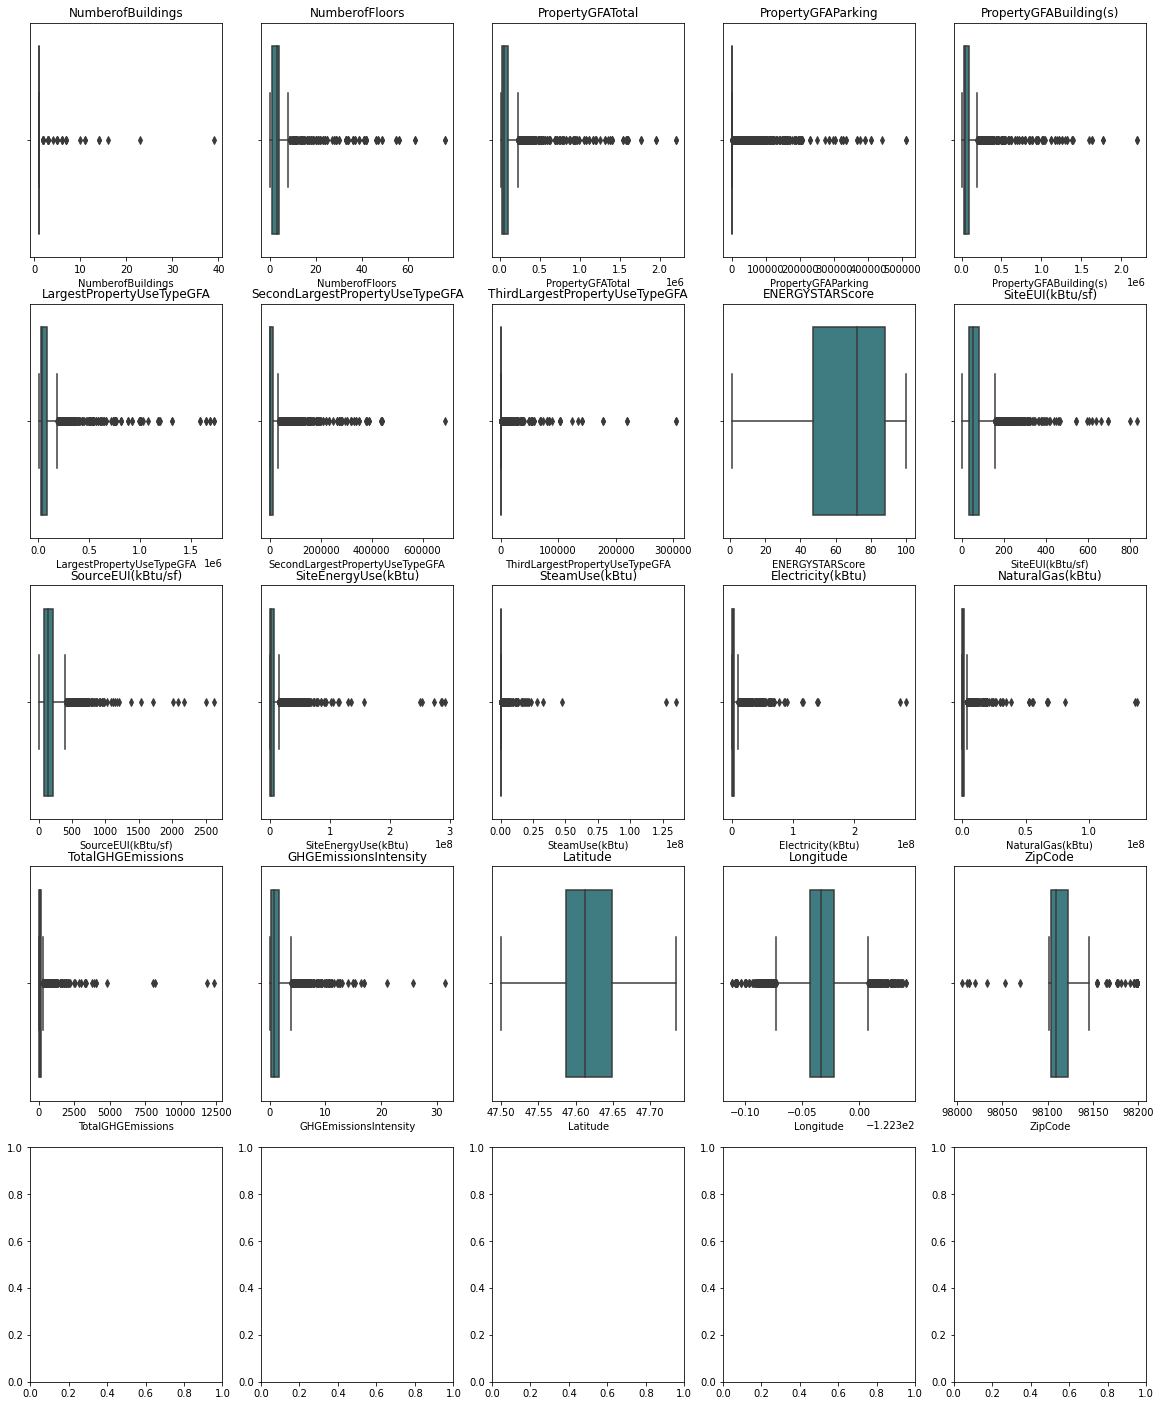

In [194]:
fig, axes = plt.subplots(5,5, figsize=(20,25))
y=0
for col in  energy_clean.select_dtypes(include = ['int64','float64']).columns[3:]:
    i,j = divmod(y,5)
    sns.boxplot(ax = axes[i,j], x=energy_clean[col], orient='h', palette='crest')
    
    axes[i,j].set_title(col)   
    y=y+1

In [171]:
energy_clean.to_csv("/content/drive/My Drive/openclassroom/Pélec_sooprayen_oorvasi/Dataset/energy_clean.csv")

In [5]:
energy_cleaned = pd.read_csv('/content/drive/My Drive/openclassroom/Pélec_sooprayen_oorvasi/Dataset/energy_clean.csv', index_col=0)

In [6]:
energy_cleaned.shape

(2800, 33)

In [7]:
data_clean = energy_cleaned.drop(energy_cleaned[(energy_cleaned['SiteEnergyUse(kBtu)']>2*10**8)].index)

In [8]:
data_clean.shape

(2788, 33)

In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 0 to 3375
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    2788 non-null   int64  
 1   DataYear                         2788 non-null   int64  
 2   BuildingType                     2788 non-null   object 
 3   PrimaryPropertyType              2788 non-null   object 
 4   Neighborhood                     2788 non-null   object 
 5   YearBuilt                        2788 non-null   int64  
 6   NumberofBuildings                2788 non-null   float64
 7   NumberofFloors                   2788 non-null   float64
 8   PropertyGFATotal                 2788 non-null   float64
 9   PropertyGFAParking               2788 non-null   int64  
 10  PropertyGFABuilding(s)           2788 non-null   int64  
 11  LargestPropertyUseType           2788 non-null   object 
 12  LargestPropertyUseTy

In [22]:
cols = data_clean.select_dtypes(exclude='object').columns

In [23]:
cols

Index(['OSEBuildingID', 'DataYear', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'ZipCode'],
      dtype='object')

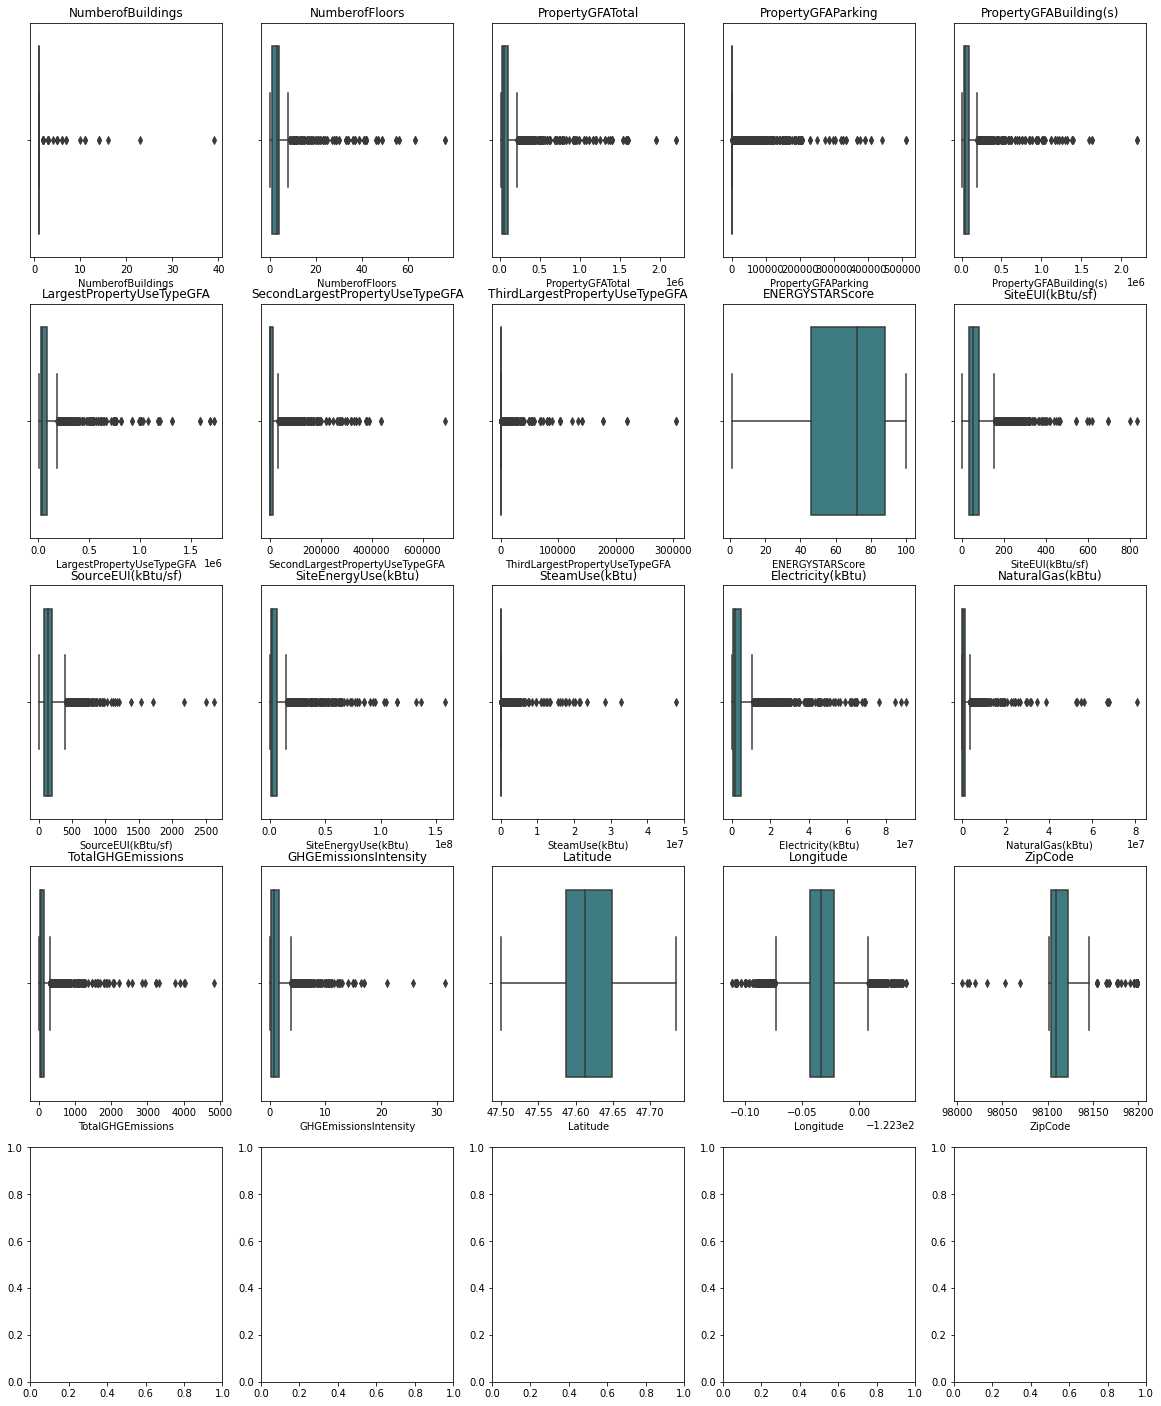

In [25]:
fig, axes = plt.subplots(5,5, figsize=(20,25))
y=0
for col in cols[3:]:
    i,j = divmod(y,5)
    sns.boxplot(ax = axes[i,j], x=data_clean[col], orient='h',palette='crest')
    
    axes[i,j].set_title(col)   
    y=y+1

# MAP visualisation as per zipcodes

In [26]:
fig = px.scatter_mapbox(data_clean,
                        lat="Latitude",
                        lon="Longitude",
                        color="TotalGHGEmissions",
                        size="SiteEnergyUse(kBtu)",
                        size_max=20,
                        zoom=9.5,
                        mapbox_style = "carto-positron",
                        hover_data = ["ZipCode"],
                        title="<b>Consommation énergétique et emission de gaz à effet de serre à Seattle</b>")
fig.show()

In [27]:
fig = px.scatter_mapbox(data_clean,
                        lat="Latitude",
                        lon="Longitude",
                        color="SiteEnergyUse(kBtu)",
                        mapbox_style = "open-street-map",
                        zoom=9,
                        hover_data = ["ZipCode"],
                        title="<b>Consommation énergétique à Seattle</b>")
fig.show()

In [28]:
fig = px.scatter_mapbox(data_clean,
                        lat="Latitude",
                        lon="Longitude",
                        color="TotalGHGEmissions",
                        mapbox_style = "open-street-map",
                        hover_data = ["ZipCode"],
                        zoom=9,
                        title="<b>Consommation emission de gaz à effet de serre à Seattle</b>")
fig.show()

Transformation en LOG afin de réduire l'espace des valeurs. 

In [29]:
data_clean['log-TotalGHGEmissions'] = np.log(1+data_clean['TotalGHGEmissions'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
data_clean['log-SiteEnergyUse'] = np.log(1+data_clean['SiteEnergyUse(kBtu)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
fig = px.scatter_mapbox(data_clean,
                        lat="Latitude",
                        lon="Longitude",
                        color="log-TotalGHGEmissions",
                        size="log-SiteEnergyUse",
                        size_max=12,
                        zoom=9.5,
                        mapbox_style = "carto-positron",
                        hover_data = ["ZipCode"],
                        title="<b>Consommation énergétique et emission de gaz à effet de serre à Seattle</b>")
fig.show()

In [32]:
fig = px.scatter_mapbox(data_clean,
                        lat="Latitude",
                        lon="Longitude",
                        color="log-TotalGHGEmissions",
                        mapbox_style = "open-street-map",
                        zoom=9.3,
                        hover_data = ["ZipCode"],
                        title="<b>Consommation emission de gaz à effet de serre à Seattle</b>")
fig.show()

In [33]:
fig = px.scatter_mapbox(data_clean,
                        lat="Latitude",
                        lon="Longitude",
                        color="log-SiteEnergyUse",
                        mapbox_style = "open-street-map",
                        zoom=9.5,
                        hover_data = ["ZipCode"],
                        title="<b>Consommation énergétique à Seattle</b>")
fig.show()

In [34]:
data_clean.to_csv("/content/drive/My Drive/openclassroom/Pélec_sooprayen_oorvasi/Dataset/final.csv")

Le nettoyage des deux jeux de données a été opéré, avec traitement des valeurs manquantes, traitement des valeurs outliers selon les règles métier, les duplications ont été enlever.

On va ensuite passer à la phase de modélisation dans le prochain notebook, utilisant différents algorithmes de machine learning, tester leurs performances, optimisé les hypers paramètres pour ensuite sélectionner le modèle le plus performant, pour prédire nos variables Target "TotalGHGEmissions'" et "SiteEnergyUseWN'" pour la consommation énergétique et émission de gaz à effet de serre à Seattle